<div style="font-size:14px;">

## *Case Studio Summary*
![Cover_img](../img/cover_img.png)

### <u>*1. Business Problem*</u>
Improving flood emergency response and management, ***providing rapidly important information about the extent of the flooding and damage assessment***. 

**Relevant figures in  2024**:
- Displacements and Fatalities: Water-related disasters, including floods, resulted in ***at least 8,700 deaths and displaced approximately 40 million people globally in 2024***

- Europe: Flooding events, such as those caused by Storm Boris in Central Europe, led to insured losses nearing  €12 billion, marking some of the costliest disasters on record for the continent.

### <u>*2. Technical Solution*</u>

- Machine and deep learning-based tools for rapid and automated flood inundation mapping can enhance emergency response times and improve decision-making during crisis management.

- This solution aims to combine and fuse multi-source data to ***classify flood surface water extend - that is, water and non-water areas***. Provided data includes Synthetic Aperture Radar (SAR) imagery from Sentinel-1 (ESA Copernicus program), Digital Elevation Models (DEM), land cover data, and global water occurrence over the past four decades.

- Target variable: water / no-water occurrence. The target variable is highly imbalanced, with the positive class (water) having the lowest frequency.

    <img src="../img/TargetFrecuencies.png" alt="Target_freq" width="400"/>

### <u>*3. EDA*</u>

-  Data understanding & cleaning:

    - 1.631 images of 512 x 512 pixels. More than 420 millions of data points.

    - The Meris DEM contains -9999 values representing No Data.

    - The Copernicus DEM includes negative values, which are physically meaningless and should be removed or imputed.

    - 'inf' and NaN values are present in VH/VV, VV/VH, and (VH–VV)/(VH+VV) due to zeros in VV and VH. These are removed.

    - The WCM variable has 0.0 values indicating No Data and should be removed.

    - The WOP variable includes values >100, representing No Data per documentation. These are also removed.

    - Due to computational limitations, using data subsets is recommended.


    <img src="../img/FeaturesHist.png" alt="Features_hist" width="900"/>

- Elevation data is duplicated (from both Copernicus and MERIS DEMs).

- Feature engineering: Aspect and Slope are derived from the DEM.

- WCM & Aspect are ***multiclass categorical features***:

    - The WCM feature is categorical, with the following class mappings. A value of 0 is considered invalid, as it represents missing data—typically pixels masked due to clouds, shadows, or other quality issues.

    | Class Code | Class Name               | Description                                 |
    |------------|:------------------------:|:-------------------------------------------:|
    | 10         | Tree cover               | Natural & planted forest and tree crops     |
    | 20         | Shrubland                | Woody vegetation < 5m                       |
    | 30         | Grassland                | Natural grasslands and managed pastures     |
    | 40         | Cropland                 | Cultivated areas, incl. rice & mosaics      |
    | 50         | Built-up                 | Urban areas, buildings, roads               |
    | 60         | Bare / sparse vegetation | Desert, rock, salt flats, very sparse veg   |
    | 70         | Snow and ice             | Permanent snow, glaciers                    |
    | 80         | Permanent water bodies   | Lakes, rivers, reservoirs, etc.             |
    | 90         | Herbaceous wetland       | Swamps, marshes with herbaceous plants      |
    | 95         | Mangroves                | Coastal, saline-tolerant forest/shrubs      |
    | 100        | Moss and lichen          | Tundra, high-latitude moss/lichen areas     |
    


    - The **aspect feature** indicates slope orientation. Binned and treated as categorical. The value 270 is a placeholder for flat surfaces (assigned by richdem).

    | Class        | Angle Range (°)         | Label |
    |--------------|--------------------------|-------|
    | Flat         | = 270                    | Flat  |
    | North        | 337.5 – 360 and 0 – 22.5 | N     |
    | North-East   | 22.5 – 67.5              | NE    |
    | East         | 67.5 – 112.5             | E     |
    | South-East   | 112.5 – 157.5            | SE    |
    | South        | 157.5 – 202.5            | S     |
    | South-West   | 202.5 – 247.5            | SW    |
    | West         | 247.5 – 269.9 and 270.1 – 292.5 | W |
    | North-West   | 292.5 – 337.5            | NW    |
    


- ***Numerical features***: VV, VH, VH_VV, VV_VH, NORM, DEM_cop, SLOPE, WOP
    - All exhibit right-skewed distributions

    - WOP’s predominant value is 0, similar to the target.

    - BDEMs provide nearly identical info — one could be removed.

    - Low elevation, low slope dominate.

    - High slope (e.g., 5000 ≈ 88°) corresponds to cliffs or vertical surfaces.


-  ***Features - target relationship***

    - <u>*Categorical features*</u>
        - Chi2 test p-value < 0.05 for all
        
    <img src="../img/Orient_barras.png" alt="Orient" width="900"/>
    <img src="../img/WCM_barras.png" alt="WCM" width="900"/>
      
    - <u>*Numerical features*</u>
        - U test p-value < 0.05 for all

    <img src="../img/Pairplot.png" alt="Pairplot" width="1200"/>

        

### <u>*4. Methodology*</u>

1. Image data (6 bands) flattened into NumPy arrays.

2. Feature engineering (Slope, Aspect, SAR ratios) performed during data loading. All integrated into one function.

3. Undersampling applied to training data to balance classes (due to large dataset size).

4. Feature transformations consolidated into a pipeline for streamlined preprocessing.

    <img src="../img/Pipeline.png" alt="Pipeline" width="600"/>

5. Baseline modeling and selection via cross-validation.

    <img src="../img/CV_results.png" alt="CV" width="600"/>





<img src="../img/FeatureImportance.png" alt="FI" width="900"/> 



6. Boosting & Bagging Optimization

    - Models tuned using Optuna, on untransformed features.

7. MLP model 

    - Data cleaned but no transformation applied except MinMaxScaler().

    - MLP topology

    <img src="../img/MLP.png" alt="MLP" width="400"/> 

    - Optimizer: Adam

    - Loss function: Binary Cross-Entropy

    - Feature selection: VH_VV, VV_VH, NORM, DEM_mer, DEM_cop, WCM, WOP

    - Training performance:

    <img src="../img/MLP_training.png" alt="MLP performance" width="800"/> 

### <u>*5. Results*</u>

- <u>*5.1 Boosting model*</u>

    - RF best model test evaluation:

    <img src="../img/LGBM_estEval.png" alt="LGBM" width="500"/> 

    - Post-training threshold tuning:

    <img src="../img/ThresholdTunning.png" alt="Threshold" width="400"/> 

    - Image prediction evaluation:

    <img src="../img/Img_pred2.png" alt="im_pred" width="400"/> 

    <img src="../img/Img_pred.png" alt="im_pred" width="400"/> 

- <u>*5.2 MLP model*</u>

    - Train evaluation:

    <img src="../img/MLP_train_eval.png" alt="MLP eval" width="400"/> 

    - Test evaluation:

    <img src="../img/MLP_test_eval.png" alt="MLP eval" width="600"/> 

    - Image prediction evaluation:

    <img src="../img/MLP_img_eval.png" alt="MLP eval" width="400"/> 

    <img src="../img/MLP_img_eval2.png" alt="MLP eval" width="400"/> 

### <u>*6: Challenges, conclusion and next steps*</u>

- ***Challengues:***

    1. High class imbalance: The dataset presents a significant imbalance between water and no-water classes, especially evident in image-level predictions, which impacts model precision and recall.

    2. Limited spatial context: The pixel-based approach does not account for spatial dependencies, potentially limiting the model’s ability to detect coherent flood patterns. This likely explains the lack of a clear relationship between the target variable and the input features, which are spatially structured. The pixel-based approach misses this context, limiting the model's capacity to capture relevant interactions.

    3. Large data volume vs. limited computational capacity.

    3. Model generalization: Performance drops when moving from test set predictions to full-image predictions, indicating challenges in real-world generalization.

- ***Conclusions:***

    1. Categorical feature WCM show a significant correlation with the target, reinforcing the importance of environmental context in flood predic

    2. Bagging and boosting models show similar performance overall, but the importance of individual features varies significantly. The orientation/aspect feature consistently contributes little predictive power.

    3. Optimization yielded a slight improvement in balanced accuracy across all models.

    4. The Random Forest (RF) model achieved the best evaluation results when applied to the test dataset.

    5. Fine-tuning the decision threshold increases the F1-score for the water class by improving precision, though at the cost of recall (i.e., fewer true positives detected).

    6. MLP training is unstable due to learning rate sensitivity. Slower learning rates (which require more computational power) improve stability.

    7. RF vs MLP:

        | Metric                 | Best RF model | Best MLP model |
        |------------------------|:---------------:|:----------------:|
        | Test - accuracy        | 0.97          | 0.86           |
        | Test - water precision | 0.80          | 0.16           |
        | Test - water recall    | 0.62          | 0.56           |
        | Test - water f1 score  | 0.70          | 0.25           |
        | Test - macro precision | 0.89          | 0.57           |
        | Test - macro recall    | 0.80          | 0.72           |
        | Test - macro f1 score  | 0.84          | 0.59           |
        | Imag - accuracy        | 0.91          | 0.96           |
        | Imag - water precision | 0.40          | 0.88           |
        | Imag - water recall    | 0.59          | 0.45           |
        | Imag - water f1 score  | 0.48          | 0.60           |
        | Imag - macro precision | 0.68          | 0.92           |
        | Imag - macro recall    | 0.76          | 0.72           |
        | Imag - macro f1 score  | 0.71          | 0.79           |



        - RF generalizes better on the test set, with balanced and reliable performance.

        - MLP has very low water precision (0.16), meaning it misclassifies many non-water pixels as water.

        - This suggests threshold calibration issues or overfitting on the test set.

        - On image-level predictions, MLP performs better in both accuracy and precision.

        - MLP generalizes better spatially and avoids over-detection.

        - RF is more sensitive (higher recall) but yields many false positives (lower precision).

        - MLP is more conservative—it predicts fewer flood pixels but is usually right when it does.


- ***Next Steps:***
    1. **Incorporate spatial context**: Use CNNs, U-Nets, or other segmentation architectures to leverage neighborhood information and spatial continuity.

    2. **Try advanced sampling techniques**: Explore SMOTE or focal loss instead of (or alongside) undersampling to address class imbalance. Train the model without enforcing a strict 50-50 class balance to potentially improve generalization.

    3. **Apply transfer learning**: Evaluate pre-trained models (e.g., DeepSARFlood) to better extract flood-relevant patterns.

    5. **Deploy a lightweight version**: For real-time or in-field use, create a simpler, faster model optimized for inference speed.

    6. **Use ensemble approaches**: Combine predictions from multiple models (e.g., LightGBM + MLP) to improve robustness across diverse geographies.


</div>

## Code:

### 0. Paths & libraries

In [3]:
import os
import sys

# Paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
utils_path = os.path.join(project_root, 'utils')
models_path = os.path.join(project_root, 'models')
data_path = os.path.join(project_root, 'data_sample')

# Add utils path to sys.path
sys.path.append(utils_path)

In [4]:
from tqdm.notebook import tqdm  
import warnings
import joblib
warnings.filterwarnings("ignore")

# Data manipulation
import numpy as np
import rasterio as rio
import numpy as np
import pandas as pd
import data_preprocessing as dP

# Statistics
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

# Image processing
from scipy.ndimage import binary_opening # post-classification filtering

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import viz as vz

# Preprocessing & pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

# Model selection and optimization
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
import optuna


# Métricas
from sklearn.metrics import balanced_accuracy_score, accuracy_score, ConfusionMatrixDisplay, classification_report, make_scorer, f1_score, confusion_matrix, cohen_kappa_score

### 1. Save & Load data

<a id='load'></a>
#### 1.1 Load data from images

In [40]:
# Images and labels directories
image_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/images'
label_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/labels' 

# Select the number of images to be processed
M = float(input("Indicar porcentaje de imágenes a procesar (valor entre 0 y 1): "))

# Load data using user function. The images are selected randomly among the total number of avilable images (1631)
X, y = dP.process_images(M,image_dir,label_dir)

Image processing:   0%|          | 0/32 [00:00<?, ?it/s]

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
[Image 1068.tif] Total: 0.07s | Load: 0.03s | SAR: 0.00s | Slope & Aspect: 0.02sLabel: 0.00s | Flatten & Stack: 0.01s
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top

#### 1.2 Save data

Use this code to save the transformed image data as NumPy arrays.

In [ ]:
# X_path = os.path.join(data_path, f'X_{M:.2f}.pkl')
# y_path = os.path.join(data_path, f'y_{M:.2f}.pkl')

# X.to_pickle(X_path)
# y.to_pickle(y_path)

#### 1.3 Load saved data

Activate this code if you need to load previously saved data (images transformed into NumPy arrays).

In [ ]:
# # Load X,y dataframes (10% of the total images)
# X_path = os.path.join(data_path, 'X_1.00.pkl') 
# y_path = os.path.join(data_path, 'y_1.00.pkl')
# X= pd.read_pickle(X_path)
# y = pd.read_pickle(y_path)

### 2. Data visualisation & cleaning

#### 2.1 Viz

In [4]:
X.head(20)

VV      VH     VH_VV     VV_VH      NORM  DEM_mer  DEM_cop   SLOPE  \
0    729.0   693.0  0.950617  1.051948 -0.025316     43.0     59.0     0.0   
1   1092.0   794.0  0.727106  1.375315 -0.158006     43.0     58.0     0.0   
2   3234.0   685.0  0.211812  4.721168 -0.650421     45.0     57.0   500.0   
3   2036.0   729.0  0.358055  2.792867 -0.472694     46.0     56.0  1000.0   
4    693.0   575.0  0.829726  1.205217 -0.093060     49.0     55.0     0.0   
5    766.0   353.0  0.460836  2.169972 -0.369080     50.0     55.0  1000.0   
6    766.0   353.0  0.460836  2.169972 -0.369080     52.0     54.0   500.0   
7   1313.0   425.0  0.323686  3.089412 -0.510932     53.0     53.0     0.0   
8   2635.0   340.0  0.129032  7.750000 -0.771429     53.0     53.0     0.0   
9   1961.0   259.0  0.132075  7.571429 -0.766667     53.0     52.0     0.0   
10   861.0   346.0  0.401858  2.488439 -0.426678     51.0     51.0     0.0   
11  1313.0   418.0  0.318355  3.141148 -0.517042     50.0     50.0     0.0   
12   575.0  1059.0  1.841739  0.542965  0.296206     49.0     50.0     0.0   
13   775.0   667.0  0.860645  1.161919 -0.074896     48.0     49.0     0.0   
14   901.0   322.0  0.357381  2.798137 -0.473426     47.0     49.0     0.0   
15   398.0   259.0  0.650754  1.536680 -0.211568     46.0     49.0     0.0   
16   891.0   559.0  0.627385  1.593918 -0.228966     46.0     49.0     0.0   
17  1991.0   641.0  0.321949  3.106084 -0.512918     46.0     50.0     0.0   
18  3330.0   446.0  0.133934  7.466368 -0.763771     46.0     50.0     0.0   
19  3447.0   591.0  0.171453  5.832487 -0.707281     46.0     49.0     0.0   

    ASPECT   WCM  WOP  
0    270.0  10.0  0.0  
1    270.0  10.0  0.0  
2    270.0  10.0  0.0  
3    180.0  30.0  0.0  
4    270.0  10.0  0.0  
5    180.0  30.0  0.0  
6     90.0  10.0  0.0  
7    270.0  10.0  0.0  
8    270.0  10.0  0.0  
9    270.0  10.0  0.0  
10   270.0  10.0  0.0  
11   270.0  10.0  0.0  
12   270.0  10.0  0.0  
13   270.0  10.0  0.0  
14   270.0  10.0  0.0  
15   270.0  10.0  0.0  
16   270.0  10.0  0.0  
17   270.0  10.0  0.0  
18   270.0  10.0  0.0  
19   270.0  10.0  0.0

In [5]:
# Nº of instances and features
n_inst, dim = X.shape[0], X.shape[1]
print(f"Nº of instances (pixels): {n_inst}, nº de features (bands): {dim}")

Nº of instances (pixels): 21233664, nº de features (bands): 11


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


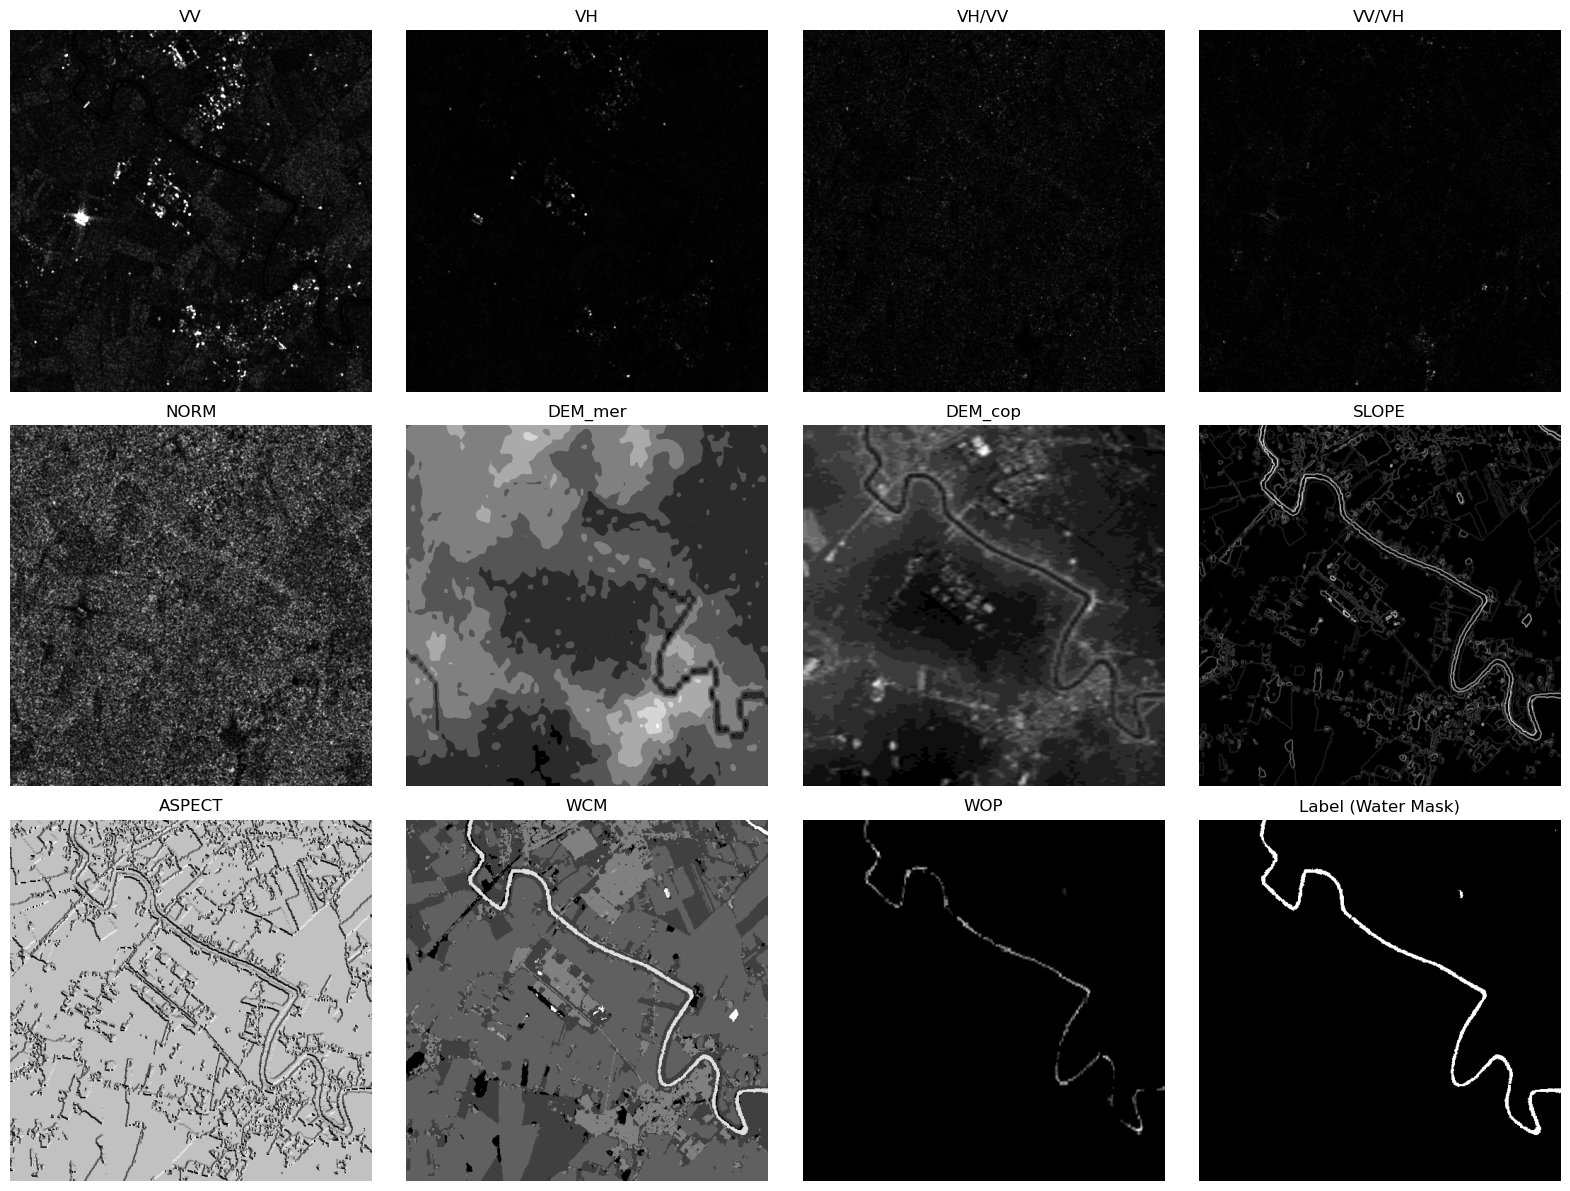

In [5]:
# Feature visualization on an image
image_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/images'
label_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/labels' 

# Select the number of images to be processed
n = int(input("Select image number (value between 0 y 1630): "))

vz.visualize_features(n, image_dir,label_dir)

In [6]:
X.describe().T

count         mean          std     min         25%  \
VV       21233664.0  1870.195801  2968.245850     0.0  685.000000   
VH       21233664.0   408.953186   868.834106     0.0  160.000000   
VH_VV    21232923.0          inf          NaN     0.0    0.134786   
VV_VH    21232923.0          inf          NaN     0.0    2.539811   
NORM     21232923.0    -0.574456     0.248787    -1.0   -0.762446   
DEM_mer  21233664.0  -192.467667  1889.246094 -9999.0   27.000000   
DEM_cop  21233664.0   161.976501   334.863953    -2.0   27.000000   
SLOPE    21233664.0   231.720749   448.849518     0.0    0.000000   
ASPECT   21233664.0   243.590454    69.017090     0.0  270.000000   
WCM      21233664.0    32.561218    17.947237     0.0   10.000000   
WOP      21233664.0     4.830834    20.389856     0.0    0.000000   

                 50%          75%           max  
VV       1189.000000  1985.000000  3.276500e+04  
VH        278.000000   452.000000  3.276500e+04  
VH_VV       0.233264     0.393730           inf  
VV_VH       4.286995     7.419152           inf  
NORM       -0.621713    -0.434998  1.000000e+00  
DEM_mer    62.000000   119.000000  2.501000e+03  
DEM_cop    63.000000   120.000000  2.487000e+03  
SLOPE       0.000000   176.776703  5.031153e+03  
ASPECT    270.000000   270.000000  3.575104e+02  
WCM        30.000000    40.000000  1.000000e+02  
WOP         0.000000     0.000000  1.240000e+02

In [7]:
# Percentage of NaN values per feature
nan_percent = (X.isna().sum() / len(X)) * 100
nan_percent = nan_percent.sort_values(ascending=False)  

nan_percent

VH_VV      0.00349
VV_VH      0.00349
NORM       0.00349
VV         0.00000
VH         0.00000
DEM_mer    0.00000
DEM_cop    0.00000
SLOPE      0.00000
ASPECT     0.00000
WCM        0.00000
WOP        0.00000
dtype: float64

In [8]:
# Load the subsample (1% of the total images)
X_path = os.path.join(data_path, 'X_0.01.pkl') 
y_path = os.path.join(data_path, 'y_0.01.pkl')
X= pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

In [9]:
X.shape

(4194304, 11)

<a id='clean'></a>
#### 2.2 Data cleaning



##### 2.2.1 Remove inf and NaN values

In [10]:
# Remove NaN and infinite values
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
y_clean = y.loc[X_clean.index].reset_index(drop=True)

##### 2.2.2 Remove No Data values (WCM & WOP)

In [11]:
# Drop rows with No Data Values for WCM and WOP columns
X_clean, y_clean = dP.drop_NoData_rows(X_clean, y_clean)

In [12]:
print(X_clean.shape)
print(y_clean.shape)

(4182615, 11)
(4182615,)


In [13]:
X_clean.describe().T # check the cleaning

count         mean          std        min         25%  \
VV       4182615.0  1834.464966  2612.614258   1.000000  807.000000   
VH       4182615.0   395.121613   623.239502   1.000000  186.000000   
VH_VV    4182615.0     0.312143     0.327342   0.000305    0.138018   
VV_VH    4182615.0     6.439882    11.100072   0.010526    2.568773   
NORM     4182615.0    -0.575052     0.244761  -0.999390   -0.757441   
DEM_mer  4182615.0   145.258072   364.333282   1.000000   24.000000   
DEM_cop  4182615.0   146.421478   366.310822   0.000000   24.000000   
SLOPE    4182615.0   264.552399   494.659607   0.000000    0.000000   
ASPECT   4182615.0   239.482803    73.462471   0.000000  270.000000   
WCM      4182615.0    30.919586    14.355376  10.000000   10.000000   
WOP      4182615.0     0.293257     4.380037   0.000000    0.000000   

                 50%          75%           max  
VV       1289.000000  2024.000000  32765.000000  
VH        301.000000   468.000000  32765.000000  
VH_VV       0.234195     0.389291     95.000000  
VV_VH       4.269953     7.245410   3276.500000  
NORM       -0.620490    -0.439583      0.979167  
DEM_mer    44.000000    82.000000   2304.000000  
DEM_cop    43.000000    84.000000   2318.000000  
SLOPE       0.000000   395.284698   4472.135742  
ASPECT    270.000000   270.000000    357.510437  
WCM        30.000000    40.000000    100.000000  
WOP         0.000000     0.000000    100.000000

### 3. Train-test split

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state= 43, stratify=y_clean) 

print(X_train.shape)
print(y_train.shape)

(3346092, 11)
(3346092,)


### 4. Variable target

In [15]:
y_train.value_counts(normalize=True)*100

Labels
0.0    95.695815
1.0     4.304185
Name: proportion, dtype: float64

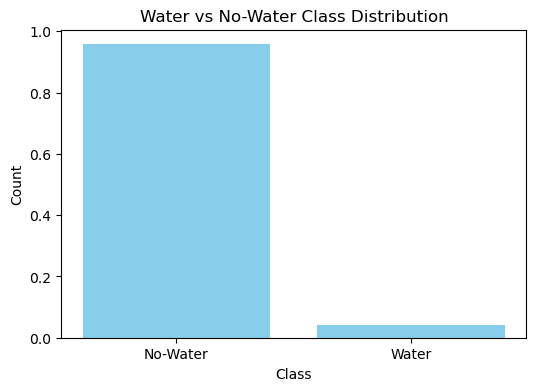

In [16]:
# Calculate frequency of each class
label_freq = y_train.value_counts(normalize=True).sort_index()

# Create mapping
label_names = {0.0: 'No-Water', 1.0: 'Water'}
label_names_list = [label_names[val] for val in label_freq.index]

# Plot
plt.figure(figsize=(6,4))
plt.bar(label_names_list, label_freq.values, color='skyblue')
plt.title('Water vs No-Water Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()


### 5. Undersampling

In [ ]:
# --- Undersampling for class balance ---
datos = X_train
datos['Labels'] = y_train

# Separate the data into water (label = 1) and non-water (label = 0)
agua = datos[datos['Labels']==1]
no_agua = datos[datos['Labels']==0]

# Sample from both datasets to create two equal-sized groups
agua_sam = agua.sample(n = len(agua))
no_agua_sam = no_agua.sample(n = len(agua))

# Combine the balanced water and non-water datasets
datos= pd.concat([agua_sam, no_agua_sam], axis=0,ignore_index=True)

# Split the balanced dataset back into features and labels
X_train_bal = datos.drop('Labels',axis='columns')
y_train_bal = datos['Labels']

In [18]:
y_train_bal.value_counts(normalize=True) # check the result of undersampling

Labels
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

### 6. Features

#### 6.1 Univariate analysis

In [19]:
X_train_bal.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288044 entries, 0 to 288043
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   VV       288044 non-null  float32
 1   VH       288044 non-null  float32
 2   VH_VV    288044 non-null  float32
 3   VV_VH    288044 non-null  float32
 4   NORM     288044 non-null  float32
 5   DEM_mer  288044 non-null  float32
 6   DEM_cop  288044 non-null  float32
 7   SLOPE    288044 non-null  float32
 8   ASPECT   288044 non-null  float32
 9   WCM      288044 non-null  float32
 10  WOP      288044 non-null  float32
dtypes: float32(11)
memory usage: 12.1 MB


In [20]:
X_train_bal.describe().T

count         mean          std        min         25%  \
VV       288044.0  1542.485229  2191.548096   1.000000  664.000000   
VH       288044.0   326.740967   521.879639   1.000000  139.000000   
VH_VV    288044.0     0.309851     0.513145   0.000305    0.127562   
VV_VH    288044.0     7.364404    17.531906   0.010638    2.637792   
NORM     288044.0    -0.586388     0.252696  -0.999390   -0.773738   
DEM_mer  288044.0    89.656021   275.468414   1.000000   15.000000   
DEM_cop  288044.0    90.280960   277.056885   0.000000   16.000000   
SLOPE    288044.0   289.337067   587.317810   0.000000    0.000000   
ASPECT   288044.0   239.825500    73.090553   0.000000  270.000000   
WCM      288044.0    33.404724    16.548014  10.000000   30.000000   
WOP      288044.0     1.951105    11.275768   0.000000    0.000000   

                 50%          75%           max  
VV       1133.000000  1805.000000  32765.000000  
VH        251.000000   407.000000  32765.000000  
VH_VV       0.222816     0.379105     94.000000  
VV_VH       4.488000     7.839299   3276.500000  
NORM       -0.635568    -0.450216      0.978947  
DEM_mer    31.000000    58.000000   2294.000000  
DEM_cop    30.000000    58.000000   2312.000000  
SLOPE       0.000000   353.553406   4304.793945  
ASPECT    270.000000   270.000000    357.510437  
WCM        40.000000    40.000000    100.000000  
WOP         0.000000     0.000000    100.000000

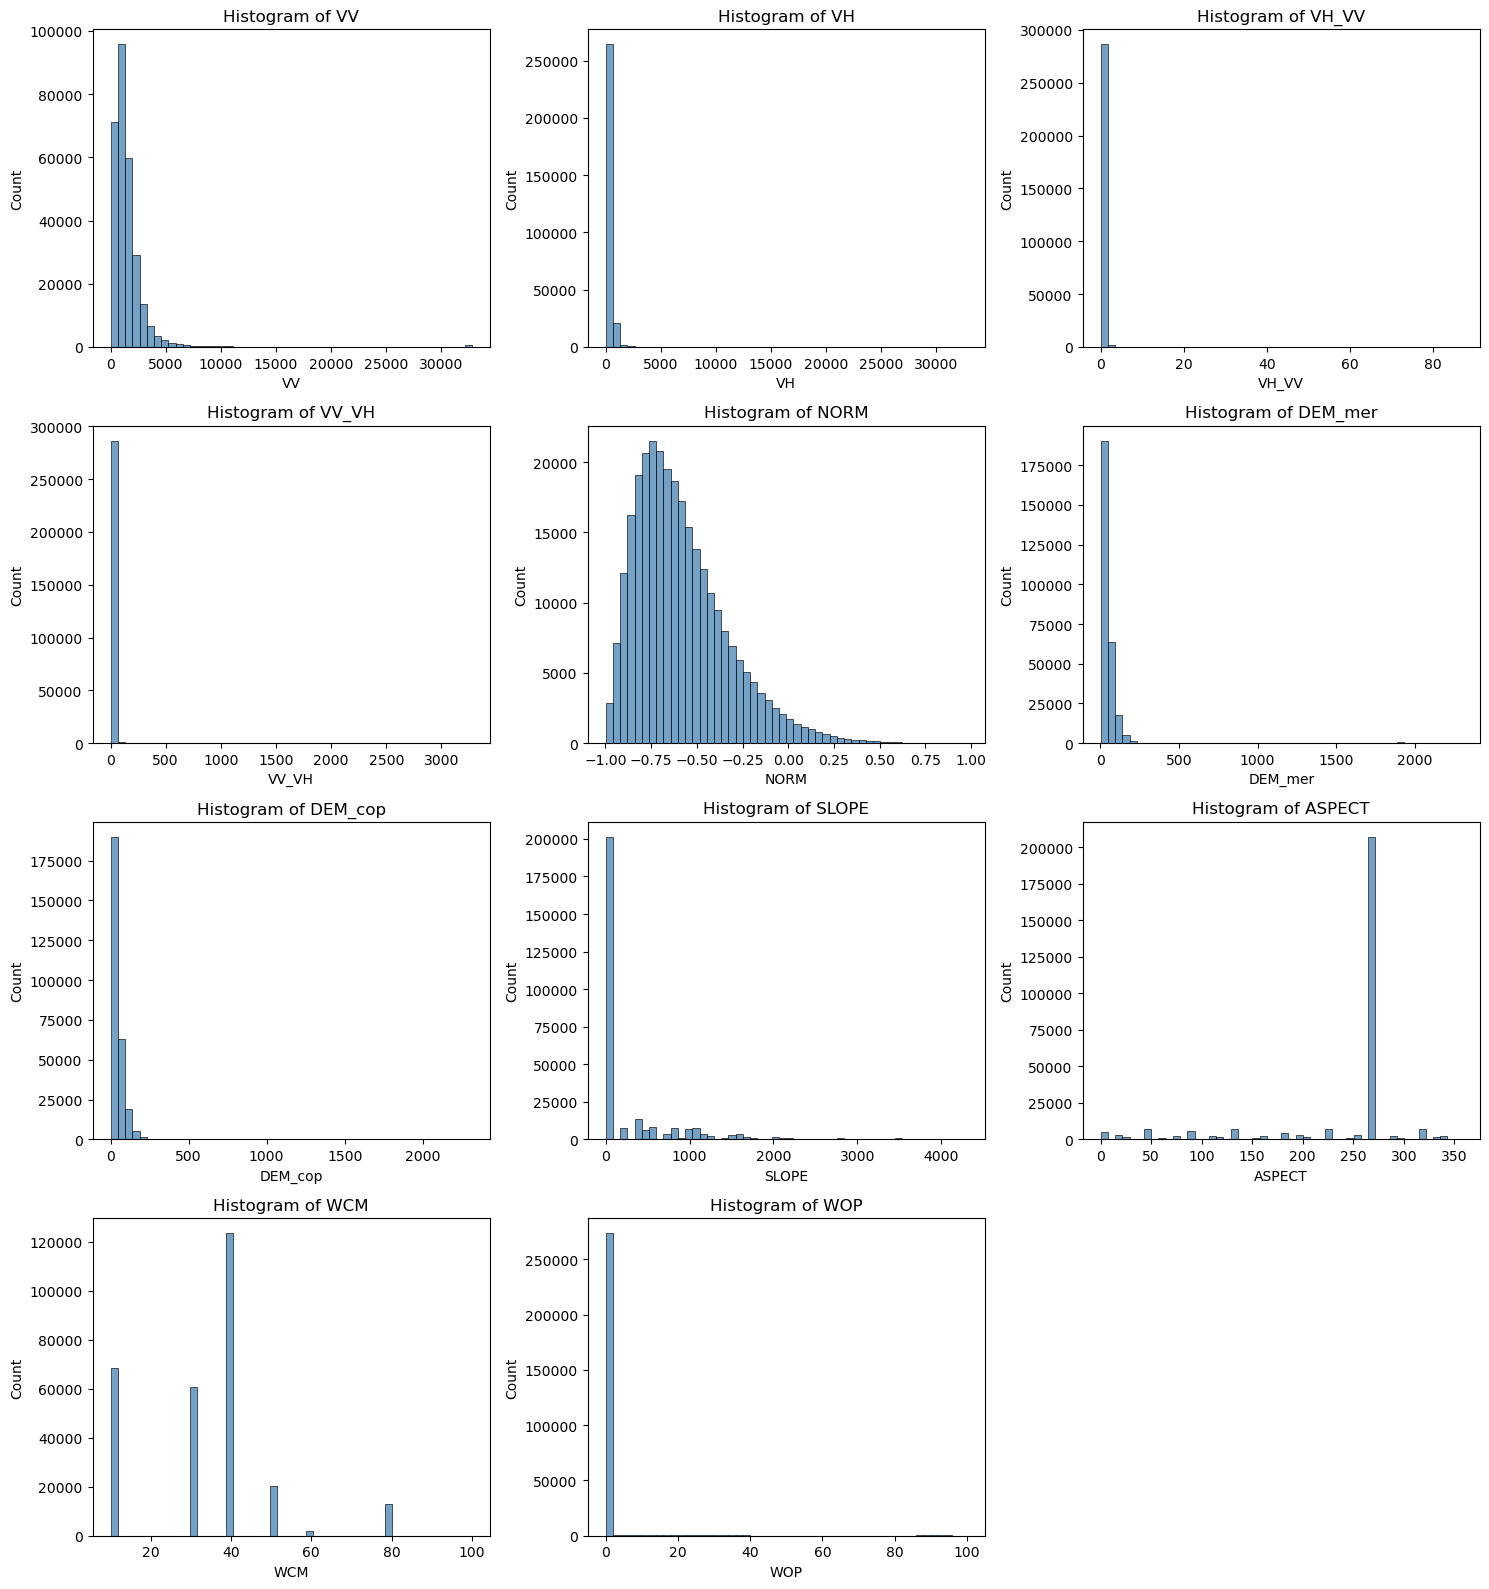

In [242]:
# Feature histograms
vz.plot_feature_histograms(X_train_bal)


#### 6.2 Features categóricas: tratamiento y análisis bivariante con el target

##### 6.2.1 Feature engineering: categorical derived features

In [21]:
# Feature aspect binning transformation
X_train_bal = dP.bin_aspect_to_direction(X_train_bal)

In [22]:
X_train_bal.ORIENT.value_counts()

ORIENT
Flat    207133
E        10973
N        10896
SE       10766
SW       10754
S        10745
NW       10675
NE       10440
W         5662
Name: count, dtype: int64

In [23]:
X_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288044 entries, 0 to 288043
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   VV       288044 non-null  float32
 1   VH       288044 non-null  float32
 2   VH_VV    288044 non-null  float32
 3   VV_VH    288044 non-null  float32
 4   NORM     288044 non-null  float32
 5   DEM_mer  288044 non-null  float32
 6   DEM_cop  288044 non-null  float32
 7   SLOPE    288044 non-null  float32
 8   ASPECT   288044 non-null  float32
 9   WCM      288044 non-null  float32
 10  WOP      288044 non-null  float32
 11  ORIENT   288044 non-null  object 
dtypes: float32(11), object(1)
memory usage: 14.3+ MB


In [24]:
# Feature WMC
X_train_bal = dP.map_wcm_classes(X_train_bal)

X_train_bal.WCM_LABEL.value_counts(normalize=True)*100

WCM_LABEL
Cropland                    42.797975
Tree cover                  23.836289
Grassland                   21.024219
Built-up                     7.134674
Permanent water bodies       4.488550
Bare / sparse vegetation     0.699893
Herbaceous wetland           0.015970
Moss and lichen              0.002083
Shrubland                    0.000347
Name: proportion, dtype: float64

In [25]:
X_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288044 entries, 0 to 288043
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   VV         288044 non-null  float32
 1   VH         288044 non-null  float32
 2   VH_VV      288044 non-null  float32
 3   VV_VH      288044 non-null  float32
 4   NORM       288044 non-null  float32
 5   DEM_mer    288044 non-null  float32
 6   DEM_cop    288044 non-null  float32
 7   SLOPE      288044 non-null  float32
 8   ASPECT     288044 non-null  float32
 9   WCM        288044 non-null  float32
 10  WOP        288044 non-null  float32
 11  ORIENT     288044 non-null  object 
 12  WCM_LABEL  288044 non-null  object 
dtypes: float32(11), object(2)
memory usage: 16.5+ MB


##### 6.2.2 Viz

In [ ]:
# Create a DataFrame for plotting and statistical analysis
y_labeled = y_train_bal.map({0: 'No-Water', 1: 'Water'})
df = pd.concat([
    X_train_bal,
    y_labeled.rename('Label'),        # categorical
    y_train_bal.rename('Label_num')       # numeric
], axis=1)

df

VV     VH     VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  \
0        665.0  555.0  0.834586   1.198198 -0.090164     22.0     23.0   
1       2019.0   72.0  0.035661  28.041666 -0.931133     16.0     15.0   
2       1484.0  164.0  0.110512   9.048780 -0.800971     13.0     13.0   
3        244.0  146.0  0.598361   1.671233 -0.251282     12.0      9.0   
4        920.0  196.0  0.213043   4.693878 -0.648746     14.0     14.0   
...        ...    ...       ...        ...       ...      ...      ...   
288039   931.0  570.0  0.612245   1.633333 -0.240506     33.0     32.0   
288040  1688.0  457.0  0.270735   3.693654 -0.573893     18.0     17.0   
288041  1358.0  173.0  0.127393   7.849711 -0.774004     30.0     27.0   
288042  1225.0  280.0  0.228571   4.375000 -0.627907    105.0    106.0   
288043  1174.0  276.0  0.235094   4.253623 -0.619310      9.0      9.0   

              SLOPE      ASPECT   WCM   WOP ORIENT               WCM_LABEL  \
0          0.000000  270.000000  30.0   0.0   Flat               Grassland   
1          0.000000  270.000000  40.0   0.0   Flat                Cropland   
2          0.000000  270.000000  40.0   0.0   Flat                Cropland   
3          0.000000  270.000000  80.0  35.0   Flat  Permanent water bodies   
4          0.000000  270.000000  40.0   0.0   Flat                Cropland   
...             ...         ...   ...   ...    ...                     ...   
288039   790.569397   71.565048  30.0   0.0      E               Grassland   
288040     0.000000  270.000000  10.0   0.0   Flat              Tree cover   
288041     0.000000  270.000000  10.0   0.0   Flat              Tree cover   
288042  1000.000000    0.000000  10.0   0.0      N              Tree cover   
288043     0.000000  270.000000  50.0   0.0   Flat                Built-up   

           Label  Label_num  
0          Water        1.0  
1          Water        1.0  
2          Water        1.0  
3          Water        1.0  
4          Water        1.0  
...          ...        ...  
288039  No-Water        0.0  
288040  No-Water        0.0  
288041  No-Water        0.0  
288042  No-Water        0.0  
288043  No-Water        0.0  

[288044 rows x 15 columns]

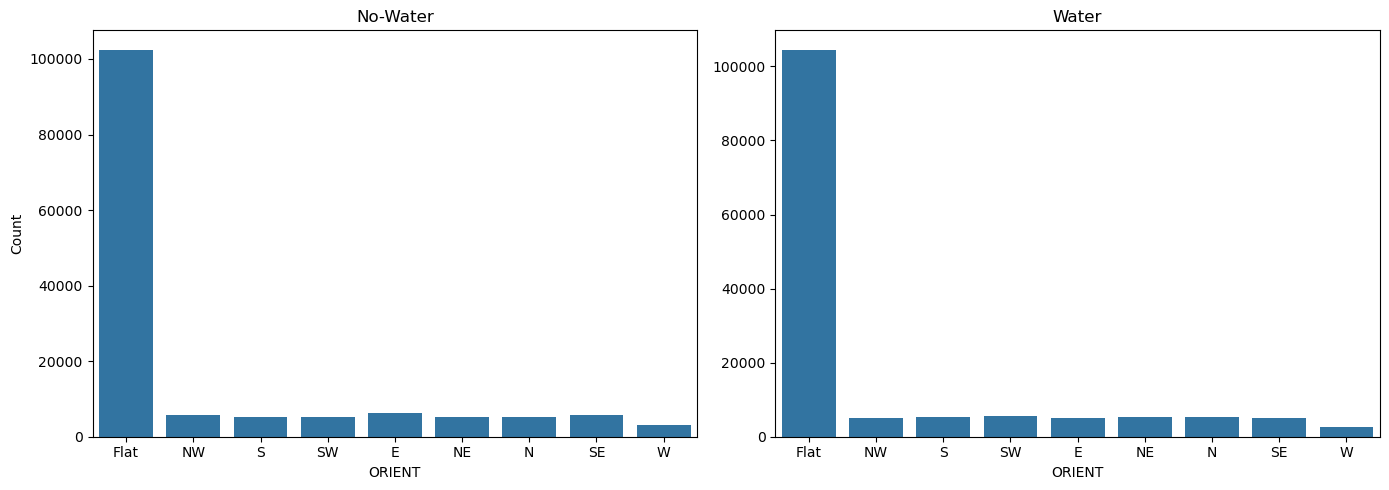

In [250]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
orient_order = df['ORIENT'].unique().tolist()  # or sort manually if preferred

# Plot No-Water
sns.countplot(x='ORIENT', data=df[df['Label'] == 'No-Water'], ax=axes[0], order=orient_order)
axes[0].set_title('No-Water')
axes[0].set_xlabel('ORIENT')
axes[0].set_ylabel('Count')

# Plot Water
sns.countplot(x='ORIENT', data=df[df['Label'] == 'Water'], ax=axes[1], order=orient_order)
axes[1].set_title('Water')
axes[1].set_xlabel('ORIENT')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Las distribuciones de ORIENT son similares tanto en zonas inundadas como no inundadas por lo que no parece una feature muy informativa

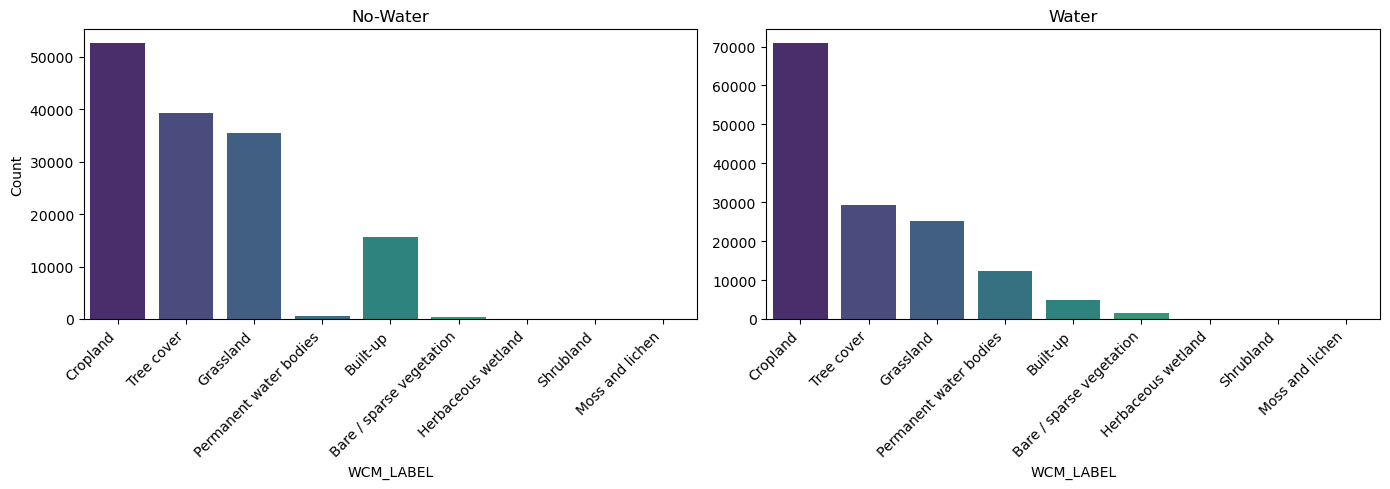

In [251]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
wcm_order = df['WCM_LABEL'].dropna().unique().tolist()  # or sort manually if preferred

# Plot No-Water
sns.countplot(x='WCM_LABEL', data=df[df['Label'] == 'No-Water'], ax=axes[0], order=wcm_order,palette='viridis')
axes[0].set_title('No-Water')
axes[0].set_xlabel('WCM_LABEL')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
# axes[0].tick_params(axis='x', rotation=45)

# Plot Water
sns.countplot(x='WCM_LABEL', data=df[df['Label'] == 'Water'], ax=axes[1], order=wcm_order, palette='viridis')
axes[1].set_title('Water')
axes[1].set_xlabel('WCM_LABEL')
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
# axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### 6.2.3 Statistical test

In [252]:
# Chi-squared test for ORIENT
contingency_orient = pd.crosstab(df['ORIENT'], df['Label_num'])
chi2_orient, p_orient, _, expected_orient = chi2_contingency(contingency_orient)
expected_orient_df = pd.DataFrame(expected_orient, 
                                  index=contingency_orient.index, 
                                  columns=contingency_orient.columns)

# Chi-squared test for WCM_LABEL
contingency_wcm = pd.crosstab(df['WCM_LABEL'], df['Label_num'])
chi2_wcm, p_wcm, _, expected_wcm = chi2_contingency(contingency_wcm)
expected_wcm_df = pd.DataFrame(expected_wcm, 
                               index=contingency_wcm.index, 
                               columns=contingency_wcm.columns)

# Results
print(f"Chi-squared test for ORIENT vs Target:")
print(f"  Chi2 = {chi2_orient:.2f}, p-value = {p_orient:.4f}")

print(f"\nChi-squared test for WCM_LABEL vs Target:")
print(f"  Chi2 = {chi2_wcm:.2f}, p-value = {p_wcm:.4f}")

Chi-squared test for ORIENT vs Target:
  Chi2 = 291.43, p-value = 0.0000

Chi-squared test for WCM_LABEL vs Target:
  Chi2 = 23220.60, p-value = 0.0000


In [253]:
# Results
print("Observed Frequencies (ORIENT):")
contingency_orient

Observed Frequencies (ORIENT):


Label_num     0.0     1.0
ORIENT                   
E            6210    4933
Flat       102461  104522
N            5332    5406
NE           5220    5321
NW           5659    5026
S            5194    5435
SE           5635    5058
SW           5187    5624
W            3124    2697

In [254]:
print("Observed Frequencies (WCM_LABEL):")
contingency_wcm

Observed Frequencies (WCM_LABEL):


Label_num                   0.0    1.0
WCM_LABEL                             
Bare / sparse vegetation    371   1656
Built-up                  15674   4791
Cropland                  52595  70879
Grassland                 35508  25144
Herbaceous wetland            4     42
Moss and lichen               2      0
Permanent water bodies      593  12297
Shrubland                     0      1
Tree cover                39275  29212

#### 6.3 Features numéricas: tratamiento y análisis bivariante con el target

##### 6.3.1 DEM negative values treatment

In [27]:
# Analysis of the negative values in the DEMs
DEM_meris_percent_negative = (X_train_bal['DEM_mer'] < 0).mean() * 100
print(f"Percentage of negative DEM_meris values: {DEM_meris_percent_negative:.2f}%")

DEM_cop_percent_negative = (X_train_bal['DEM_cop'] < 0).mean() * 100
print(f"Percentage of negative DEM_cop values: {DEM_cop_percent_negative:.2f}%")

Percentage of negative DEM_meris values: 0.00%
Percentage of negative DEM_cop values: 0.00%


In [ ]:
# Replace negative values in DEM_cop with corresponding values from DEM_mer 
# (handles cases where the subsample contains negative elevation values)
X_train_bal['DEM_cop_filled'] = X_train_bal['DEM_cop'].where(X_train_bal['DEM_cop'] >= 0, X_train_bal['DEM_mer'])
X_train_bal['DEM_cop_filled'] = X_train_bal['DEM_cop_filled'].apply(lambda x: x if x >= 0 else 0)

In [ ]:
# Check data cleaning and imputation
DEM_cop_percent_negative = (X_train_bal['DEM_cop_filled'] < 0).mean() * 100
print(f"Percentage of negative DEM_cop_filled values: {DEM_cop_percent_negative:.2f}%")

Percentage of negative DEM_cop_filled values: 0.00%


In [32]:
X_train_bal

VV     VH     VH_VV      VV_VH      NORM  DEM_mer  DEM_cop  \
0        665.0  555.0  0.834586   1.198198 -0.090164     22.0     23.0   
1       2019.0   72.0  0.035661  28.041666 -0.931133     16.0     15.0   
2       1484.0  164.0  0.110512   9.048780 -0.800971     13.0     13.0   
3        244.0  146.0  0.598361   1.671233 -0.251282     12.0      9.0   
4        920.0  196.0  0.213043   4.693878 -0.648746     14.0     14.0   
...        ...    ...       ...        ...       ...      ...      ...   
288039   931.0  570.0  0.612245   1.633333 -0.240506     33.0     32.0   
288040  1688.0  457.0  0.270735   3.693654 -0.573893     18.0     17.0   
288041  1358.0  173.0  0.127393   7.849711 -0.774004     30.0     27.0   
288042  1225.0  280.0  0.228571   4.375000 -0.627907    105.0    106.0   
288043  1174.0  276.0  0.235094   4.253623 -0.619310      9.0      9.0   

              SLOPE      ASPECT   WCM   WOP ORIENT               WCM_LABEL  \
0          0.000000  270.000000  30.0   0.0   Flat               Grassland   
1          0.000000  270.000000  40.0   0.0   Flat                Cropland   
2          0.000000  270.000000  40.0   0.0   Flat                Cropland   
3          0.000000  270.000000  80.0  35.0   Flat  Permanent water bodies   
4          0.000000  270.000000  40.0   0.0   Flat                Cropland   
...             ...         ...   ...   ...    ...                     ...   
288039   790.569397   71.565048  30.0   0.0      E               Grassland   
288040     0.000000  270.000000  10.0   0.0   Flat              Tree cover   
288041     0.000000  270.000000  10.0   0.0   Flat              Tree cover   
288042  1000.000000    0.000000  10.0   0.0      N              Tree cover   
288043     0.000000  270.000000  50.0   0.0   Flat                Built-up   

        DEM_cop_filled  
0                 23.0  
1                 15.0  
2                 13.0  
3                  9.0  
4                 14.0  
...                ...  
288039            32.0  
288040            17.0  
288041            27.0  
288042           106.0  
288043             9.0  

[288044 rows x 14 columns]

In [33]:
num_features = ['VV','VH','VH_VV','VV_VH','NORM','DEM_cop_filled','SLOPE','WOP'] # Just one DEM selected. Copernicus since the data is more updated

##### 6.3.2 Visual analysis

In [ ]:
# Create a DataFrame for plotting and statistical analysis
df = pd.concat([
    X_train_bal,
    y_labeled.rename('Label'),        # categorical
    y_train_bal.rename('Label_num')       # numeric
], axis=1)

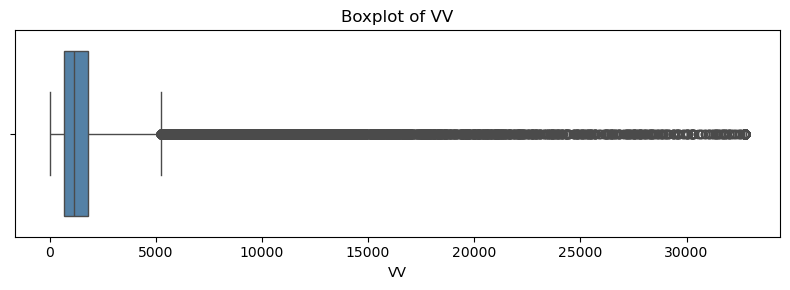

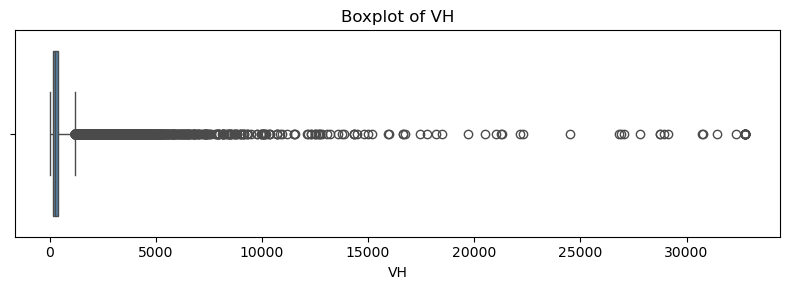

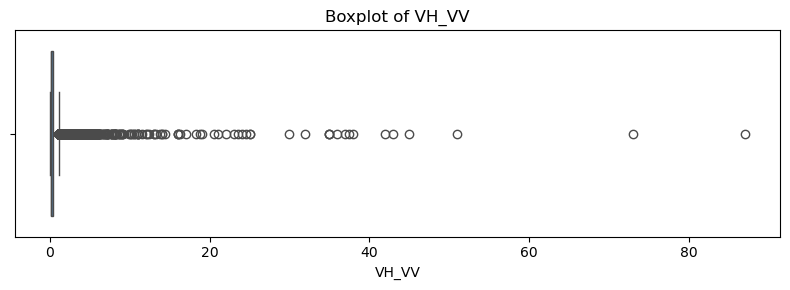

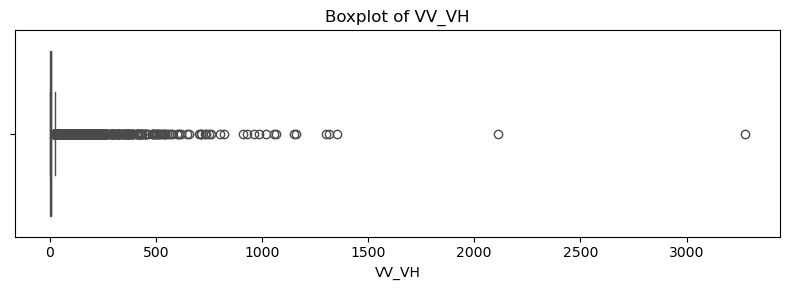

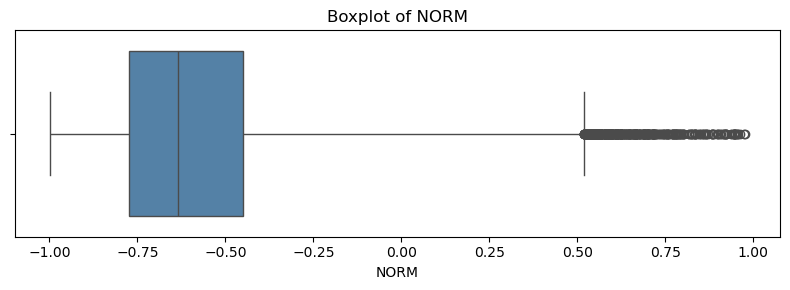

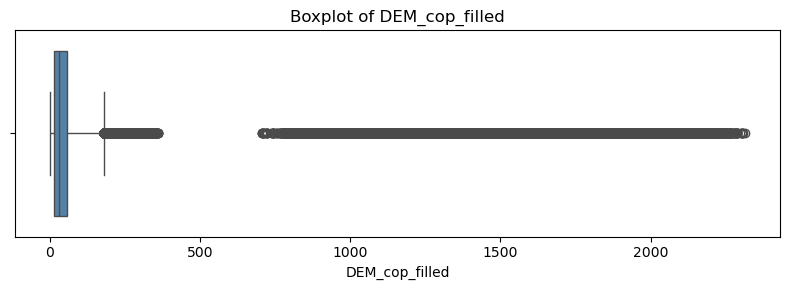

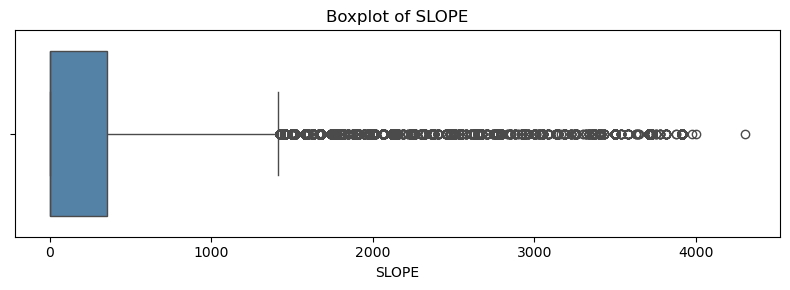

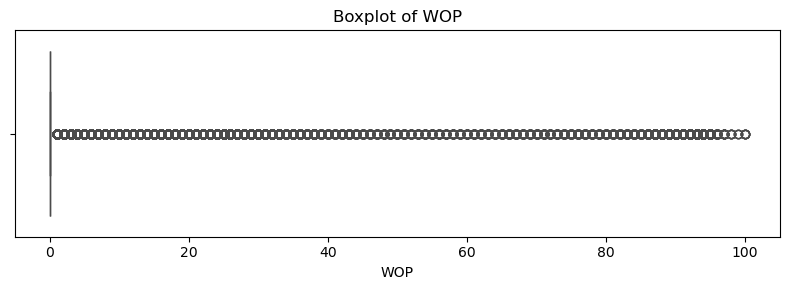

In [284]:
# Boxplot of the numerical features
# X_sample = X_train.sample(n=3000000, random_state=42) #10% of the data


# Plot one boxplot per feature
for col in num_features:
    plt.figure(figsize=(8, 3))
    # sns.boxplot(x=X_sample[col], color='steelblue',whis=3)
    sns.boxplot(x=X_train_bal[col], color='steelblue',whis=3)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


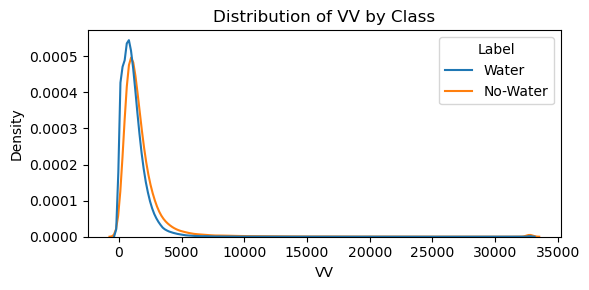

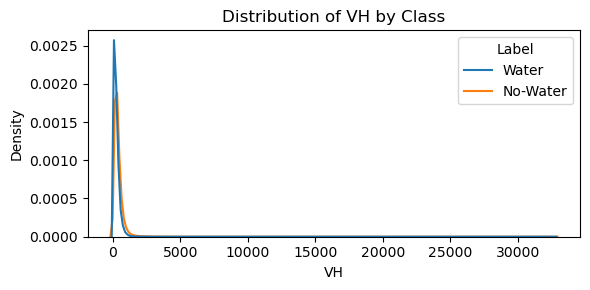

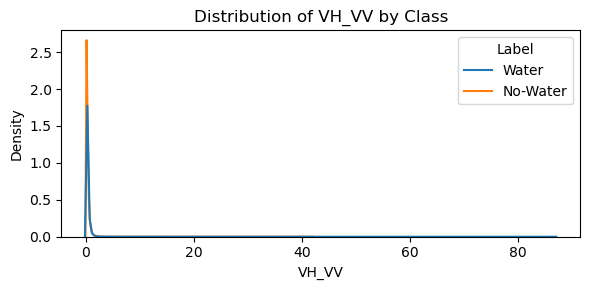

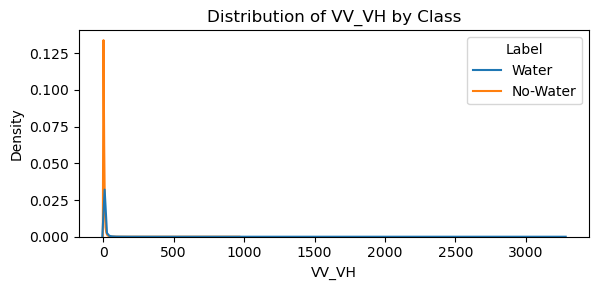

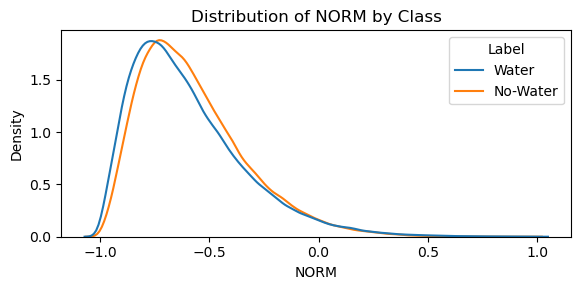

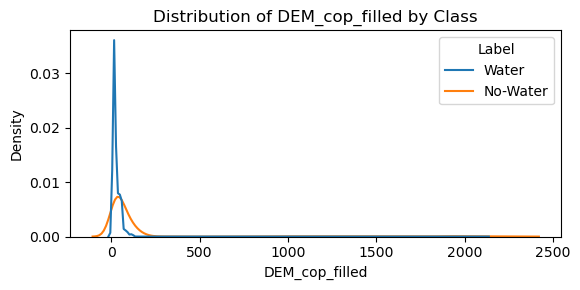

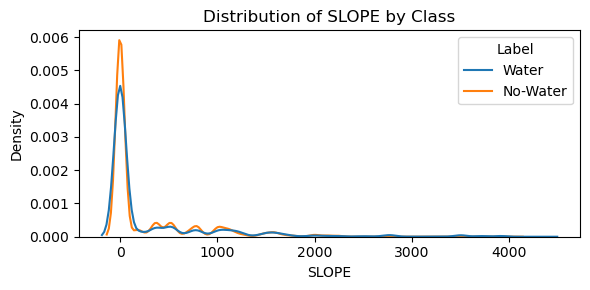

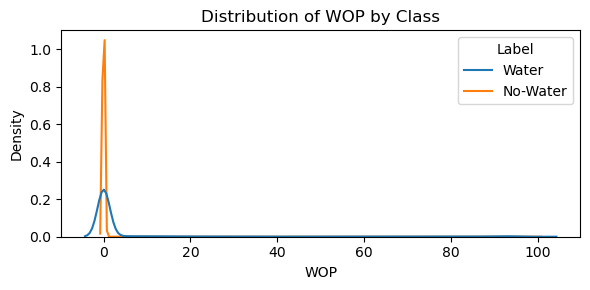

In [285]:
# X_sample = df.sample(n=50000, random_state=42) #10% of the data

# KDE plot of the numerical features
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(data=df, x=col, hue='Label', common_norm=False)
    plt.title(f'Distribution of {col} by Class')
    plt.tight_layout()
    plt.show()


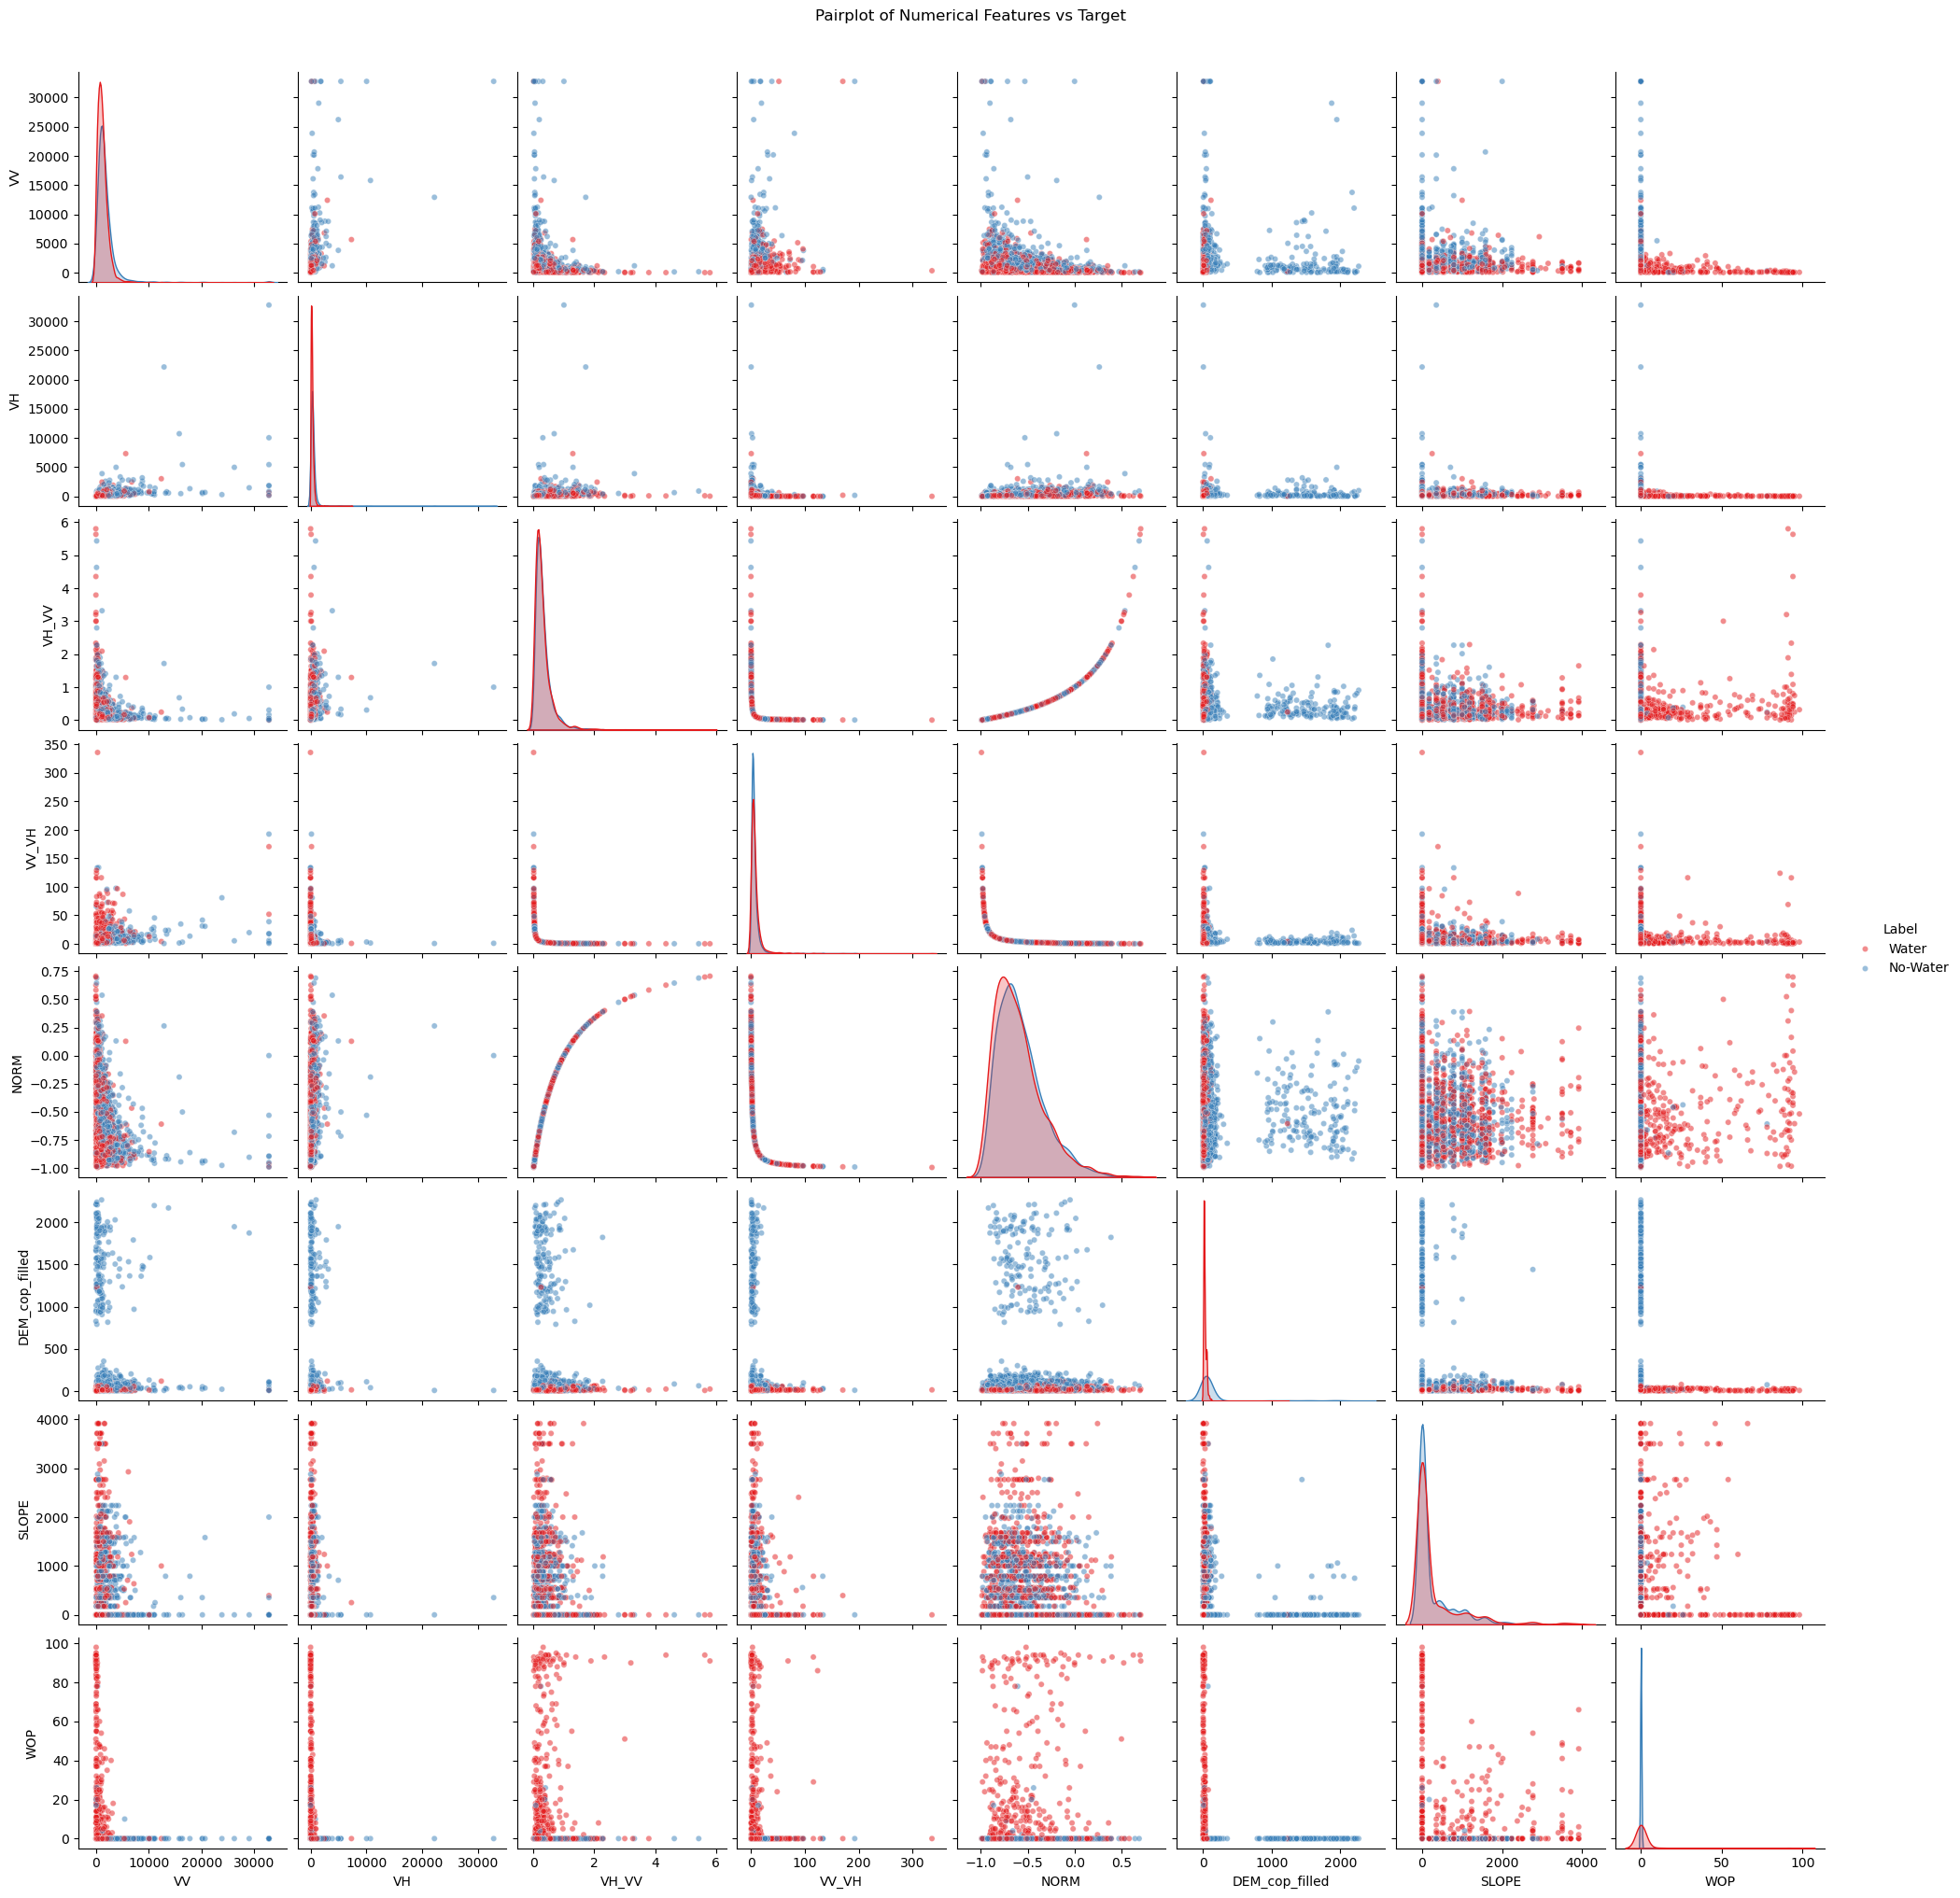

In [286]:
# Create a df for plotting
X_sample = df.sample(n=5000, random_state=42)

# Plot
sns.pairplot(
            data=X_sample[num_features + ['Label']],
             hue='Label',
             palette='Set1',
             plot_kws={'alpha': 0.5, 's': 20},  # s = marker size
             kind='scatter') 

plt.suptitle("Pairplot of Numerical Features vs Target", y=1.02)
plt.show()

##### 6.3.3 Statistical test

In [287]:
# Mann-Whitney U test for numerical features to test for significant differences between classes
results = [] #  DataFrame to store results

for col in num_features:
    group_0 = df[df['Label'] == 'No-Water'][col]
    group_1 = df[df['Label'] == 'Water'][col]
    
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    results.append({'Feature': col, 'U_statistic': stat, 'p_value': p})


u_test_results = pd.DataFrame(results).sort_values(by='p_value') # Results to DataFrame

print(u_test_results) # Show results

          Feature   U_statistic        p_value
0              VV  1.307374e+10   0.000000e+00
1              VH  1.387186e+10   0.000000e+00
5  DEM_cop_filled  1.529892e+10   0.000000e+00
7             WOP  9.360791e+09   0.000000e+00
2           VH_VV  1.117336e+10  4.908011e-283
3           VV_VH  9.568978e+09  4.908011e-283
4            NORM  1.117336e+10  4.908015e-283
6           SLOPE  1.043521e+10   4.057019e-04


##### 6.3.4 Transformations

In [288]:
# Log transformation of numerical features
X_train_bal_log = X_train_bal.copy()
X_train_bal_log[num_features]=X_train_bal_log[num_features].apply(lambda x: np.log1p(x))

# Standardize numerical features
scaler = StandardScaler()
X_train_bal_scaled = X_train_bal_log.copy()
X_train_bal_scaled[num_features] = scaler.fit_transform(X_train_bal_log[num_features])

In [289]:
X_train_bal_scaled.describe().T

count          mean         std        min         25%  \
VV              288044.0 -3.208794e-16    1.000002  -6.469421   -0.440239   
VH              288044.0 -1.397187e-16    1.000002  -4.868996   -0.468782   
VH_VV           288044.0 -1.963561e-17    1.000002  -1.303458   -0.671643   
VV_VH           288044.0  1.335024e-16    1.000002  -2.515195   -0.699254   
NORM            288044.0  2.723331e-17    1.000002  -8.951445   -0.560011   
DEM_mer         288044.0  8.937240e+01  275.438171   1.000000   15.000000   
DEM_cop         288044.0  8.998485e+01  277.035065   0.000000   16.000000   
SLOPE           288044.0 -7.770374e-17    1.000002  -0.651221   -0.651221   
ASPECT          288044.0  2.397235e+02   73.175919   0.000000  270.000000   
WCM             288044.0  3.341094e+01   16.538918  10.000000   30.000000   
WOP             288044.0  5.288788e-17    1.000002  -0.220053   -0.220053   
DEM_cop_filled  288044.0  5.130914e-17    1.000002  -3.416587   -0.697816   

                       50%         75%          max  
VV                0.117593    0.597710     3.606490  
VH                0.144097    0.639041     5.181545  
VH_VV            -0.242686    0.390573    22.319372  
VV_VH            -0.117438    0.560011     8.951471  
NORM              0.117438    0.699254     2.515195  
DEM_mer          31.000000   58.000000  2299.000000  
DEM_cop          30.000000   57.000000  2315.000000  
SLOPE            -0.651221    1.263679     2.078080  
ASPECT          270.000000  270.000000   357.510437  
WCM              40.000000   40.000000   100.000000  
WOP              -0.220053   -0.220053     6.001042  
DEM_cop_filled   -0.121309    0.479842     4.018061

### 7. Model selection with CV

#### 7.1 Pipelines to streamline the preprocessing

Retrieve the original X_train and y_train (before transformations) and apply undersampling

In [34]:
# Load X,y dataframes (10% of the total images)
X_path = os.path.join(data_path, 'X_0.01.pkl') 
y_path = os.path.join(data_path, 'y_0.01.pkl')
X= pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

To use a larger data sample, run the [Load data from images](#load) section first, then proceed below.

In [41]:
print ('X & y shape:')
print(X.shape)
print(y.shape)

X & y shape:
(8388608, 11)
(8388608,)


In [42]:
# Remove NaN and infinite values
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
y_clean = y.loc[X_clean.index].reset_index(drop=True)

# Drop rows with No Data Values for WCM and WOP columns
X_clean, y_clean = dP.drop_NoData_rows(X_clean, y_clean)

In [43]:
#  Train, test split from X_clean and y_clean
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state= 43, stratify=y_clean) 

print ('X_train and y_train shape, before undersampling:')
print(X_train.shape)
print(y_train.shape)


X_train and y_train shape, before undersampling:
(6696134, 11)
(6696134,)


In [ ]:
# --- Undersampling for class balance ---
datos = X_train
datos['Labels'] = y_train

# Separate the data into water (label = 1) and non-water (label = 0)
agua = datos[datos['Labels']==1]
no_agua = datos[datos['Labels']==0]

# Sample from both datasets to create two equal-sized groups
agua_sam = agua.sample(n = len(agua))
no_agua_sam = no_agua.sample(n = len(agua))

# Combine the balanced water and non-water datasets
datos= pd.concat([agua_sam, no_agua_sam], axis=0,ignore_index=True)

# Split the balanced dataset back into features and labels
X_train_bal = datos.drop('Labels',axis='columns')
y_train_bal = datos['Labels']

print ('X_train and y_train shape, after undersampling:')
print(X_train_bal.shape)
print(y_train_bal.shape)

In [45]:
# ------------------- Cat preprocessing pipeline ----------------------------#
# Function transformers for aspect binning and WCM mapping
aspect_transformer = FunctionTransformer(dP.bin_aspect_to_direction, validate=False)
wcm_transformer = FunctionTransformer(dP.map_wcm_classes, validate=False) # function updated handling 'No Data'

# Preprocessing pipeline for OneHotEncoding
cat_preprocessing_pipe = Pipeline([('bin_aspect', aspect_transformer), ('map_wcm', wcm_transformer)])

# OHE for the engineered categorical features
ohe_columns = ['ORIENT', 'WCM_LABEL']

OHE_encoder = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False),ohe_columns)], remainder='drop')

# Combine everything into a pipeline
cat_preprocessing_pipeline = Pipeline([('cat_preprocessing', cat_preprocessing_pipe), ('ohe', OHE_encoder)])

# ------------------- Num preprocessing pipeline ----------------------------#
num_features = ['VV','VH','VH_VV','VV_VH','NORM','DEM_cop_filled','SLOPE','WOP']

# Apply the function for cleaning DEM and WOP (negative values and No Data)
DEM_filled = FunctionTransformer(dP.DEM_filled,validate=False)

# Apply log transformation and standard scaler
log_and_scale_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])

# Full pipeline for numerical features
num_preprocessing_pipeline = Pipeline([
    ('DEM', DEM_filled),
    ('log_and_scale', ColumnTransformer([
        ('log_scale', log_and_scale_pipeline, num_features)
    ], remainder='drop'))
])

#--------------------  Full preprocessing pipeline ----------------------------------#

# Join the pipelines
full_preprocessing = FeatureUnion([
    ('num_pipeline', num_preprocessing_pipeline),
    ('cat_pipeline', cat_preprocessing_pipeline)
])

# Full pipeline with dropping bad rows (No data)
full_preprocessing_pipeline = Pipeline([
    ('preprocess', full_preprocessing)
])

full_preprocessing_pipeline

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('DEM',
                                                                  FunctionTransformer(func=<function DEM_filled at 0x000001BBDFB6BF70>)),
                                                                 ('log_and_scale',
                                                                  ColumnTransformer(transformers=[('log_scale',
                                                                                                   Pipeline(steps=[('log',
                                                                                                                    FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                                                   ('scale',
                                                                                                                    StandardScaler())]),
                                                                                                   ['VV',
                                                                                                    'VH',
                                                                                                    'VH_VV',
                                                                                                    'VV_VH'...
                                                 Pipeline(steps=[('cat_preprocessing',
                                                                  Pipeline(steps=[('bin_aspect',
                                                                                   FunctionTransformer(func=<function bin_aspect_to_direction at 0x000001BBDFB6BD30>)),
                                                                                  ('map_wcm',
                                                                                   FunctionTransformer(func=<function map_wcm_classes at 0x000001BBDFB6BDC0>))])),
                                                                 ('ohe',
                                                                  ColumnTransformer(transformers=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['ORIENT',
                                                                                                    'WCM_LABEL'])]))]))]))])

In [46]:
# Fit and transform the pipeline
X_train_proc =full_preprocessing_pipeline.fit_transform(X_train_bal.copy())

# Create a df to check the transformation result
ohe_feature_names = full_preprocessing_pipeline.named_steps['preprocess'] \
    .transformer_list[1][1] \
    .named_steps['ohe'] \
    .named_transformers_['ohe'] \
    .get_feature_names_out(ohe_columns)

num_feature_names = num_features  # or modified if clean_numeric_features adds/drops some

# Combine names
all_feature_names = np.concatenate([num_feature_names, ohe_feature_names])

# Create the DataFrame
X_train_proc_df = pd.DataFrame(X_train_proc, columns=all_feature_names)

X_train_proc_df.describe().T

count          mean       std  \
VV                                  879202.0 -2.671479e-16  1.000001   
VH                                  879202.0  1.305999e-16  1.000001   
VH_VV                               879202.0  5.689501e-17  1.000001   
VV_VH                               879202.0  1.262035e-16  1.000001   
NORM                                879202.0 -1.624094e-16  1.000001   
DEM_cop_filled                      879202.0  2.136149e-16  1.000001   
SLOPE                               879202.0  4.228334e-17  1.000001   
WOP                                 879202.0 -9.103202e-17  1.000001   
ORIENT_E                            879202.0  2.752041e-02  0.163594   
ORIENT_Flat                         879202.0  8.062948e-01  0.395201   
ORIENT_N                            879202.0  2.539007e-02  0.157307   
ORIENT_NE                           879202.0  2.467579e-02  0.155135   
ORIENT_NW                           879202.0  2.645012e-02  0.160470   
ORIENT_S                            879202.0  2.516373e-02  0.156622   
ORIENT_SE                           879202.0  2.629771e-02  0.160019   
ORIENT_SW                           879202.0  2.469398e-02  0.155191   
ORIENT_W                            879202.0  1.351339e-02  0.115459   
WCM_LABEL_Bare / sparse vegetation  879202.0  3.256362e-03  0.056972   
WCM_LABEL_Built-up                  879202.0  7.367249e-02  0.261237   
WCM_LABEL_Cropland                  879202.0  2.876677e-01  0.452676   
WCM_LABEL_Grassland                 879202.0  1.820742e-01  0.385906   
WCM_LABEL_Herbaceous wetland        879202.0  7.051849e-05  0.008397   
WCM_LABEL_Moss and lichen           879202.0  1.592353e-05  0.003990   
WCM_LABEL_Permanent water bodies    879202.0  2.501462e-01  0.433097   
WCM_LABEL_Shrubland                 879202.0  1.933572e-05  0.004397   
WCM_LABEL_Tree cover                879202.0  2.030773e-01  0.402290   

                                         min       25%       50%       75%  \
VV                                 -3.724426 -0.828442  0.289875  0.696171   
VH                                 -2.531242 -0.787905  0.329477  0.711792   
VH_VV                              -1.312185 -0.683418 -0.255494  0.394505   
VV_VH                              -2.619930 -0.709696 -0.099343  0.593795   
NORM                               -8.473995 -0.593795  0.099343  0.709696   
DEM_cop_filled                     -1.563546 -0.449346  0.209513  0.605127   
SLOPE                              -0.508542 -0.508542 -0.508542 -0.508542   
WOP                                -0.578158 -0.578158 -0.578158  0.411479   
ORIENT_E                            0.000000  0.000000  0.000000  0.000000   
ORIENT_Flat                         0.000000  1.000000  1.000000  1.000000   
ORIENT_N                            0.000000  0.000000  0.000000  0.000000   
ORIENT_NE                           0.000000  0.000000  0.000000  0.000000   
ORIENT_NW                           0.000000  0.000000  0.000000  0.000000   
ORIENT_S                            0.000000  0.000000  0.000000  0.000000   
ORIENT_SE                           0.000000  0.000000  0.000000  0.000000   
ORIENT_SW                           0.000000  0.000000  0.000000  0.000000   
ORIENT_W                            0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Bare / sparse vegetation  0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Built-up                  0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Cropland                  0.000000  0.000000  0.000000  1.000000   
WCM_LABEL_Grassland                 0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Herbaceous wetland        0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Moss and lichen           0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Permanent water bodies    0.000000  0.000000  0.000000  1.000000   
WCM_LABEL_Shrubland                 0.000000  0.000000  0.000000  0.000000   
WCM_LABEL_Tree cover                0.000000  0.000000  0.000000  

In [47]:
X_train_proc_df.isna().sum()

VV                                    0
VH                                    0
VH_VV                                 0
VV_VH                                 0
NORM                                  0
DEM_cop_filled                        0
SLOPE                                 0
WOP                                   0
ORIENT_E                              0
ORIENT_Flat                           0
ORIENT_N                              0
ORIENT_NE                             0
ORIENT_NW                             0
ORIENT_S                              0
ORIENT_SE                             0
ORIENT_SW                             0
ORIENT_W                              0
WCM_LABEL_Bare / sparse vegetation    0
WCM_LABEL_Built-up                    0
WCM_LABEL_Cropland                    0
WCM_LABEL_Grassland                   0
WCM_LABEL_Herbaceous wetland          0
WCM_LABEL_Moss and lichen             0
WCM_LABEL_Permanent water bodies      0
WCM_LABEL_Shrubland                   0


In [48]:
print ('X_train and y_train shape, after features transformations:')
print(X_train_proc.shape)
print(y_train_bal.shape)

X_train and y_train shape, after features transformations:
(879202, 26)
(879202,)


#### 7.2 Model selection with CV

In [49]:
X_train = X_train_proc
y_train = y_train_bal

print ('X_train and y_train shape:')
print(X_train.shape)
print(y_train.shape)

X_train and y_train shape:
(879202, 26)
(879202,)


In [50]:
feature_names = X_train_proc_df.columns.tolist()
feature_names

['VV',
 'VH',
 'VH_VV',
 'VV_VH',
 'NORM',
 'DEM_cop_filled',
 'SLOPE',
 'WOP',
 'ORIENT_E',
 'ORIENT_Flat',
 'ORIENT_N',
 'ORIENT_NE',
 'ORIENT_NW',
 'ORIENT_S',
 'ORIENT_SE',
 'ORIENT_SW',
 'ORIENT_W',
 'WCM_LABEL_Bare / sparse vegetation',
 'WCM_LABEL_Built-up',
 'WCM_LABEL_Cropland',
 'WCM_LABEL_Grassland',
 'WCM_LABEL_Herbaceous wetland',
 'WCM_LABEL_Moss and lichen',
 'WCM_LABEL_Permanent water bodies',
 'WCM_LABEL_Shrubland',
 'WCM_LABEL_Tree cover']

In [53]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'LightGBM': LGBMClassifier(n_jobs=-1)
}

# Stratified K-Fold CV
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv = StratifiedKFold(n_splits=3)

# Scoring metrics
scoring = ['accuracy', 'recall_macro', 'f1_macro']

# List to store results
all_results = []
feature_importance_df = pd.DataFrame()

# Loop through models and run cross-validation
for name, model in tqdm(models.items(), desc="Evaluating models"):
    cv_results = cross_validate(model, X_train, y_train,
                                cv=cv,
                                scoring=scoring,
                                n_jobs=-1)

    all_results.append({
        'Model': name,
        'Mean Accuracy': np.mean(cv_results['test_accuracy']),
        'Mean Recall': np.mean(cv_results['test_recall_macro']),
        'Mean F1 Score': np.mean(cv_results['test_f1_macro']),
        'Std Accuracy': np.std(cv_results['test_accuracy']),
        'Std Recall': np.std(cv_results['test_recall_macro']),
        'Std F1 Score': np.std(cv_results['test_f1_macro'])
    })

    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(f"\n{name}")
    print(classification_report(y_train, y_pred, digits=4))

    # Train model to get feature importances
    if name in ['Random Forest', 'XGBoost', 'LightGBM']:
        model.fit(X_train, y_train)
        if hasattr(model, "feature_importances_"):
            fi = model.feature_importances_
            feature_names_used = feature_names if len(feature_names) == len(fi) else [f"Feature {i}" for i in range(len(fi))]
            temp_df = pd.DataFrame({"Feature": feature_names_used, "Importance": fi, "Model": name})
            feature_importance_df = pd.concat([feature_importance_df, temp_df])

# Convert to DataFrame
df_results = pd.DataFrame(all_results).sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)
df_results

Evaluating models:   0%|          | 0/4 [00:00<?, ?it/s]


Logistic Regression
              precision    recall  f1-score   support

         0.0     0.7599    0.8744    0.8131    439601
         1.0     0.8521    0.7237    0.7827    439601

    accuracy                         0.7990    879202
   macro avg     0.8060    0.7990    0.7979    879202
weighted avg     0.8060    0.7990    0.7979    879202


Random Forest
              precision    recall  f1-score   support

         0.0     0.9995    0.9976    0.9985    439601
         1.0     0.9976    0.9995    0.9985    439601

    accuracy                         0.9985    879202
   macro avg     0.9985    0.9985    0.9985    879202
weighted avg     0.9985    0.9985    0.9985    879202


XGBoost
              precision    recall  f1-score   support

         0.0     0.8059    0.9183    0.8584    439601
         1.0     0.9050    0.7788    0.8372    439601

    accuracy                         0.8486    879202
   macro avg     0.8555    0.8486    0.8478    879202
weighted avg     0.8555    0.

Model  Mean Accuracy  Mean Recall  Mean F1 Score  \
0              XGBoost       0.845737     0.845737       0.844988   
1             LightGBM       0.842029     0.842029       0.841000   
2        Random Forest       0.838152     0.838152       0.837736   
3  Logistic Regression       0.799017     0.799017       0.797878   

   Std Accuracy  Std Recall  Std F1 Score  
0      0.000754    0.000754      0.000775  
1      0.000664    0.000664      0.000656  
2      0.000460    0.000460      0.000459  
3      0.000614    0.000614      0.000612

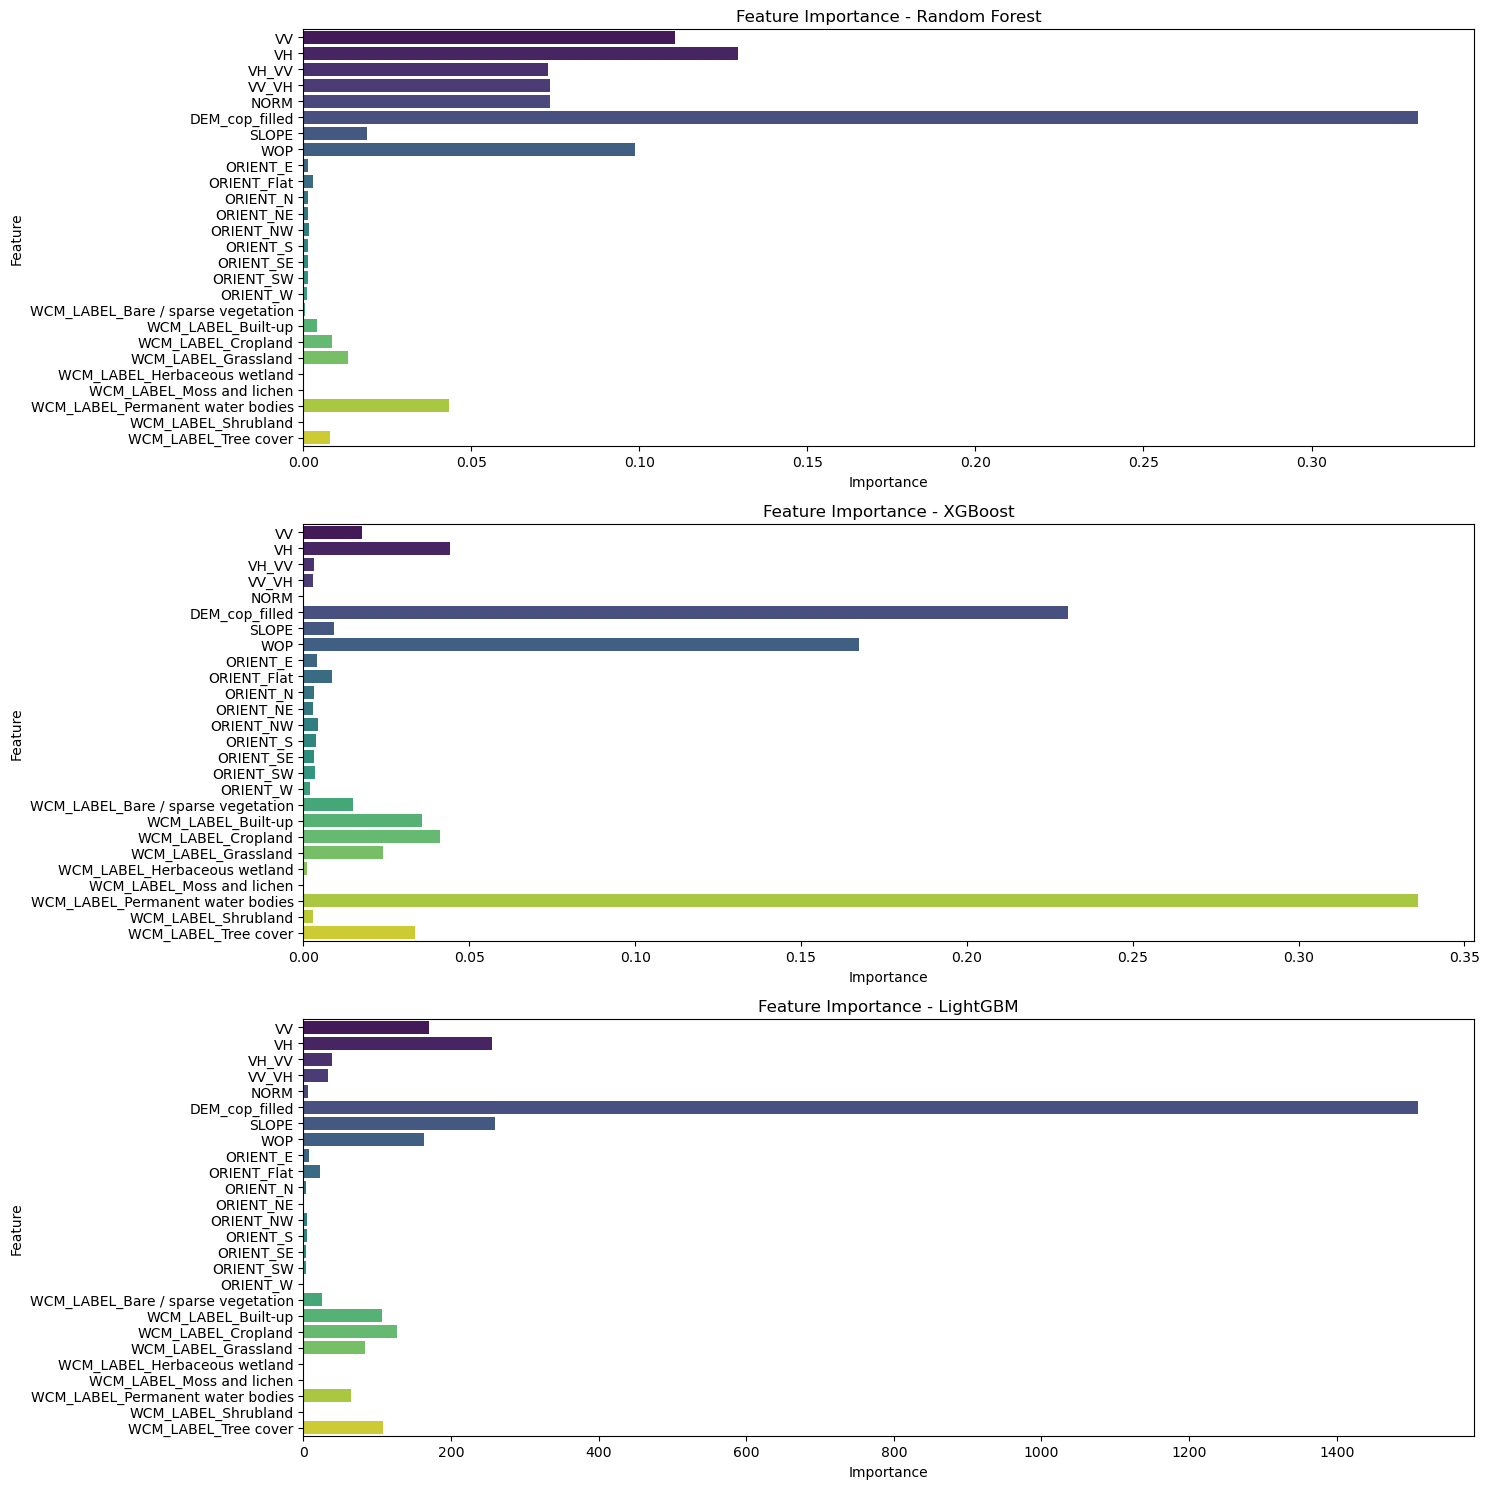

In [41]:
# Plot feature importance for each model
plt.figure(figsize=(15, 15))
for i, model in enumerate(feature_importance_df["Model"].unique()):
    plt.subplot(3, 1, i + 1)
    sns.barplot(data=feature_importance_df[feature_importance_df["Model"] == model], 
                x='Importance', y='Feature', palette='viridis')
    plt.title(f"Feature Importance - {model}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 8.Boosting and bagging models optimization with optuna

In [ ]:
# Load X,y dataframes (10% of the total images)
X_path = os.path.join(data_path, 'X_0.01.pkl') 
y_path = os.path.join(data_path, 'y_0.01.pkl')
X= pd.read_pickle(X_path)
y = pd.read_pickle(y_path)

In case you want to work with a larger sample of data, run this sections previously:

[Load data from images](#load)

Then, continue with the next cell

In [115]:
print ('X & y shape:')
print(X.shape)
print(y.shape)

X & y shape:
(21233664, 11)
(21233664,)


In [116]:
# Remove NaN and infinite values
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
y_clean = y.loc[X_clean.index].reset_index(drop=True)

# Drop rows with No Data Values for WCM and WOP columns
X_clean, y_clean = dP.drop_NoData_rows(X_clean, y_clean)

In [117]:
#  Train, test split from X_clean and y_clean
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state= 43, stratify=y_clean) 

print ('X_train and y_train shape, before undersampling:')
print(X_train.shape)
print(y_train.shape)

X_train and y_train shape, before undersampling:
(16927484, 11)
(16927484,)


In [ ]:
# --- Undersampling for class balance ---
datos = X_train
datos['Labels'] = y_train

# Separate the data into water (label = 1) and non-water (label = 0)
agua = datos[datos['Labels']==1]
no_agua = datos[datos['Labels']==0]

# Sample from both datasets to create two equal-sized groups
agua_sam = agua.sample(n = len(agua))
no_agua_sam = no_agua.sample(n = len(agua))

# Combine the balanced water and non-water datasets
datos= pd.concat([agua_sam, no_agua_sam], axis=0,ignore_index=True)

# Split the balanced dataset back into features and labels
X_train_bal = datos.drop('Labels',axis='columns')
y_train_bal = datos['Labels']

print ('X_train and y_train shape, after undersampling:')
print(X_train_bal.shape)
print(y_train_bal.shape)

X_train and y_train shape, after undersampling:
(2712100, 11)
(2712100,)


In [119]:
# Feature selection
# X_train = X_train_bal[['VV','VH','VH_VV','VV_VH','NORM','DEM_cop','SLOPE','WCM','WOP']]
# X_train = X_train_bal[['VV','VH','VH_VV','VV_VH','NORM','DEM_mer','DEM_cop','SLOPE','ASPECT','WCM','WOP']]
X_train = X_train_bal
y_train = y_train_bal

print ('X_train and y_train shape:')
print(X_train.shape)
print(y_train.shape)

X_train and y_train shape:
(2712100, 11)
(2712100,)


In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712100 entries, 0 to 2712099
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   VV       float32
 1   VH       float32
 2   VH_VV    float32
 3   VV_VH    float32
 4   NORM     float32
 5   DEM_mer  float32
 6   DEM_cop  float32
 7   SLOPE    float32
 8   ASPECT   float32
 9   WCM      float32
 10  WOP      float32
dtypes: float32(11)
memory usage: 113.8 MB


#### 8.1 LGB

In [ ]:
def objective_lgb(trial):
    # 1. Suggest values for hyperparameters
    param = {
        'objective': 'binary',  # binary classification
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'verbosity': -1,  # silent mode
        # 'is_unbalance': True,  # handles class imbalance

        # Tuneable hyperparameters
        'n_estimators': trial.suggest_int('n_estimators', 50, 200), 
        # 'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        # 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        # 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True)
    }

    # 2. Create the model
    model =LGBMClassifier(**param)

    # 3. Perform Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=make_scorer(balanced_accuracy_score),
        n_jobs=-1
    )

    # 4. Return the mean balanced accuracy
    return score.mean()

In [45]:
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=50)  # You can try 100+ for deeper tuning

[I 2025-03-30 17:56:10,242] A new study created in memory with name: no-name-bd2719b4-845a-4f3b-8372-2b70747566f6
[I 2025-03-30 17:56:27,966] Trial 0 finished with value: 0.8580758454532852 and parameters: {'n_estimators': 103, 'num_leaves': 144, 'max_depth': 14, 'min_child_samples': 82, 'feature_fraction': 0.7240929808686905, 'bagging_fraction': 0.810404435514515, 'bagging_freq': 3}. Best is trial 0 with value: 0.8580758454532852.
[I 2025-03-30 17:56:39,639] Trial 1 finished with value: 0.8423365741190503 and parameters: {'n_estimators': 151, 'num_leaves': 80, 'max_depth': 3, 'min_child_samples': 59, 'feature_fraction': 0.7565721455473847, 'bagging_fraction': 0.9368229949411304, 'bagging_freq': 1}. Best is trial 0 with value: 0.8580758454532852.
[I 2025-03-30 17:57:15,025] Trial 2 finished with value: 0.8605212452051447 and parameters: {'n_estimators': 192, 'num_leaves': 124, 'max_depth': 13, 'min_child_samples': 29, 'feature_fraction': 0.7912368934066412, 'bagging_fraction': 0.891935

In [46]:
print("Best trial:")
trial_lgb = study_lgb.best_trial
print(f"  Balanced Accuracy: {trial_lgb.value}")
print("  Best hyperparameters:")
for key, val in trial_lgb.params.items():
    print(f"    {key}: {val}")

Best trial:
  Balanced Accuracy: 0.8623638246895252
  Best hyperparameters:
    n_estimators: 182
    num_leaves: 179
    max_depth: 14
    min_child_samples: 15
    feature_fraction: 0.9703892085534191
    bagging_fraction: 0.7019511464485859
    bagging_freq: 1


#### 8.2 XGB

In [ ]:
def objective_xgb(trial):
    # 1. Suggest hyperparameters
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'verbosity': 0,
        # 'scale_pos_weight': scale_pos_weight,  # helps with imbalance

        # Hyperparameters to tune
        # 'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        # 'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200) 
    }

    # 2. Create the model
    model = XGBClassifier(**param)

    # 3. Cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # cv = StratifiedKFold(n_splits=5)
    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=make_scorer(balanced_accuracy_score),
        n_jobs=-1
    )

    # 4. Return average CV score
    return score.mean()


In [81]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)  # Or more if time allows

[I 2025-03-30 18:37:14,437] A new study created in memory with name: no-name-fff8148b-74db-4798-880e-ac462545b061
[I 2025-03-30 18:37:30,816] Trial 0 finished with value: 0.8595919923211733 and parameters: {'max_depth': 14, 'min_child_weight': 4, 'gamma': 4.029369224288924, 'subsample': 0.787012051044007, 'colsample_bytree': 0.5075281409379179, 'n_estimators': 199}. Best is trial 0 with value: 0.8595919923211733.
[I 2025-03-30 18:37:45,715] Trial 1 finished with value: 0.8593986366120989 and parameters: {'max_depth': 15, 'min_child_weight': 19, 'gamma': 1.0581222988961896, 'subsample': 0.6598753097567006, 'colsample_bytree': 0.5992857212682225, 'n_estimators': 55}. Best is trial 0 with value: 0.8595919923211733.
[I 2025-03-30 18:38:11,980] Trial 2 finished with value: 0.8610512719593514 and parameters: {'max_depth': 12, 'min_child_weight': 3, 'gamma': 2.386847960570091, 'subsample': 0.5953400411008138, 'colsample_bytree': 0.8561335894811073, 'n_estimators': 181}. Best is trial 2 with v

In [82]:
print("Best trial:")
trial_xgb = study_xgb.best_trial

print(f"  Balanced Accuracy: {trial_xgb.value}")
print("  Best hyperparameters:")
for key, val in trial_xgb.params.items():
    print(f"    {key}: {val}")


Best trial:
  Balanced Accuracy: 0.863695715585686
  Best hyperparameters:
    max_depth: 12
    min_child_weight: 10
    gamma: 0.07325215594154477
    subsample: 0.8992043569995319
    colsample_bytree: 0.8485248019865281
    n_estimators: 157


#### 8.3 RF

In [ ]:
def objective_rf(trial):
    param = {
        'boosting_type': 'rf', # RF mode
        'objective': 'binary', # Binary classification               
        'metric': 'binary_error', # Classification error             

        # Hyperparameters to tune
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': 1,                    # Needed for RF mode
        # 'lambda_l1': trial.suggest_float('lambda_l1', 0, 5),
        # 'lambda_l2': trial.suggest_float('lambda_l2', 0, 5),
        # 'learning_rate': 0.05,                # Fixed in RF mode (low impact)
        'verbosity': -1,
        # 'device': 'gpu',                      # Set to 'gpu' if GPU is available
        # 'gpu_platform_id': 0,
        # 'gpu_device_id': 0
    }



    model = lgb.LGBMClassifier(**param)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(
        model,
        X_train, y_train,
        cv=cv,
        scoring=make_scorer(accuracy_score),
        n_jobs=-1
    )

    return score.mean()

In [101]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)  

[I 2025-03-30 19:04:11,471] A new study created in memory with name: no-name-3928f750-21d3-4d44-a0e2-38d0ddb3a5de
[I 2025-03-30 19:04:33,491] Trial 0 finished with value: 0.8427767447286822 and parameters: {'n_estimators': 175, 'num_leaves': 61, 'max_depth': 17, 'min_data_in_leaf': 57, 'feature_fraction': 0.665323098718336, 'bagging_fraction': 0.9985519699353719}. Best is trial 0 with value: 0.8427767447286822.
[I 2025-03-30 19:04:47,856] Trial 1 finished with value: 0.8412128274253823 and parameters: {'n_estimators': 105, 'num_leaves': 44, 'max_depth': 16, 'min_data_in_leaf': 85, 'feature_fraction': 0.9412189009589977, 'bagging_fraction': 0.685065772235345}. Best is trial 0 with value: 0.8427767447286822.
[I 2025-03-30 19:05:00,567] Trial 2 finished with value: 0.8276152698016297 and parameters: {'n_estimators': 165, 'num_leaves': 86, 'max_depth': 3, 'min_data_in_leaf': 16, 'feature_fraction': 0.9647039332823134, 'bagging_fraction': 0.9640298669326424}. Best is trial 0 with value: 0.8

In [ ]:
print("Best trial:")
trial_rf = study_rf.best_trial

print(f"Accuracy: {trial_rf.value}")
print("  Best hyperparameters:")
for key, val in trial_rf.params.items():
    print(f"    {key}: {val}")

#### 8.3 Best Models

In [47]:
# LGB
best_params_lgb = study_lgb.best_trial.params

best_model = LGBMClassifier(**best_params_lgb)
best_model.fit(X_train, y_train)

# Save the model
model_filename = os.path.join(models_path, 'best_lgb_model.pkl')
joblib.dump(best_model, model_filename)

Exception in thread Thread-59:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\subprocess.py", line 1479, in _readerthread
    buffer.append(fh.read())
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 27: invalid start byte
  File "c:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 262, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines

[LightGBM] [Warning] feature_fraction is set=0.9703892085534191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9703892085534191
[LightGBM] [Warning] bagging_fraction is set=0.7019511464485859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7019511464485859
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9703892085534191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9703892085534191
[LightGBM] [Warning] bagging_fraction is set=0.7019511464485859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7019511464485859
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 439601, number of negative: 439601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022439 seconds.
You c

['c:\\Users\\maria\\Documents\\03_DS\\ML_SAR_floods\\src\\models\\best_lgb_model.pkl']

In [84]:
# XGB
best_params_xgb = study_xgb.best_trial.params

best_model = XGBClassifier(**best_params_xgb)
best_model.fit(X_train, y_train)

# Save the model
model_filename = os.path.join(models_path, 'best_xgb_model.pkl')
joblib.dump(best_model, model_filename)

['c:\\Users\\maria\\Documents\\03_DS\\ML_SAR_floods\\src\\models\\best_xgb_model.pkl']

In [103]:
# RF
best_params_rf = study_rf.best_trial.params

best_model = LGBMClassifier(**best_params_rf)
best_model.fit(X_train, y_train)

# Save the model
model_filename = os.path.join(models_path, 'best_rf_model.pkl')
joblib.dump(best_model, model_filename)

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8513751634092882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513751634092882
[LightGBM] [Warning] bagging_fraction is set=0.6949836519942416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949836519942416
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8513751634092882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513751634092882
[LightGBM] [Warning] bagging_fraction is set=0.6949836519942416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949836519942416
[LightGBM] [Info] Number of positive: 439601, number of negative: 439601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

['c:\\Users\\maria\\Documents\\03_DS\\ML_SAR_floods\\src\\models\\best_rf_model.pkl']

### 9. Model Evaluation

In [ ]:
# Import best_model:
model_filename = os.path.join(models_path, 'best_rf_model.pkl')
# Load the model
best_model = joblib.load(model_filename)

In [ ]:
# Check X_test and y_test shape:
print ('X_test and y_test shape:')

print(X_test.shape)
print(y_test.shape)

X_test and y_test shape:
(1674034, 11)
(1674034,)


#### 9.1 Predictions

In [106]:
y_pred = best_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8513751634092882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513751634092882
[LightGBM] [Warning] bagging_fraction is set=0.6949836519942416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949836519942416


#### 9.2 Evaluation metrics

Test Accuracy: 0.9109289297588938
Test Kappa: 0.49719517071291486

Classification Report :
              precision    recall  f1-score   support

     no_agua       0.98      0.92      0.95   1564134
        agua       0.41      0.80      0.54    109900

    accuracy                           0.91   1674034
   macro avg       0.70      0.86      0.75   1674034
weighted avg       0.95      0.91      0.92   1674034



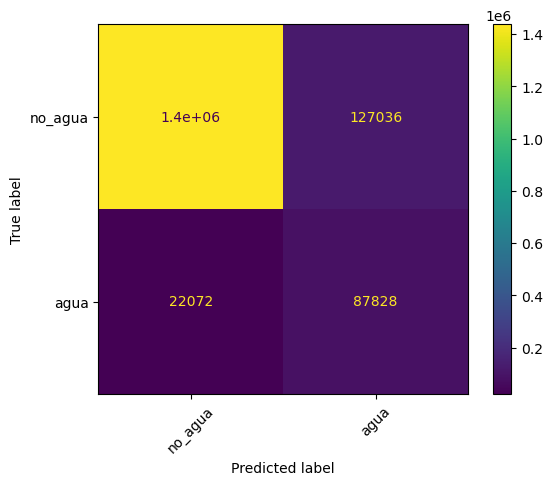

In [ ]:
# Classification report
classes = ['no_agua','agua']
Kappa=cohen_kappa_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test Kappa: {Kappa}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['no_agua','agua']

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot();
plt.xticks(rotation=45)
plt.show()

#### 9.3 Post-training tunning decision threshold 

In [108]:
# Get predicted probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Try lower thresholds
thresholds = np.linspace(0, 1, 100)
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold for F1: {best_threshold:.2f} with F1: {best_f1:.2f}")

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8513751634092882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513751634092882
[LightGBM] [Warning] bagging_fraction is set=0.6949836519942416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949836519942416
Best threshold for F1: 0.87 with F1: 0.70


In [109]:
# Use best threshold to generate final predictions
y_pred_final = (y_proba >= best_threshold).astype(int)

# Evaluate
print(f"Best threshold: {best_threshold:.2f}")
print(f"F1 Score at best threshold: {best_f1:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred_final, target_names=['No-Water', 'Water']))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_final))

Best threshold: 0.87
F1 Score at best threshold: 0.6990
Classification report:
              precision    recall  f1-score   support

    No-Water       0.97      0.99      0.98   1564134
       Water       0.80      0.62      0.70    109900

    accuracy                           0.97   1674034
   macro avg       0.89      0.80      0.84   1674034
weighted avg       0.96      0.97      0.96   1674034

Balanced Accuracy: 0.8041094096491339


#### 9.4 Model evaluation in a image

In [ ]:
# --- Run inference and evaluation on a single image ---
# Select an image by its index
num_file = 90
# Process the image: returns a flattened DataFrame, true labels, and image dimensions
img_df, label, row, col = dP.process_img(num_file)
# Predict class probabilities using the best trained model
img_proba = best_model.predict(img_df)

# Convert probabilities to binary predictions (threshold = 0.5)
img_pred = [1 if i > .5 else 0 for i in img_proba]

# Reshape predictions to 2D image format (512x512), apply morphological opening, then flatten again
img_pred = np.reshape(img_pred,(row,col))
img_pred = binary_opening(img_pred)
img_pred = np.reshape(img_pred,(row*col))

# Compute evaluation metrics
Kappa=cohen_kappa_score(label, img_pred)
accuracy = accuracy_score(label, img_pred)

# Print performance results
print(f"Test Accuracy: {accuracy}")
print(f"Test Kappa: {Kappa}")
print("\nClassification Report :")
print(classification_report(label, img_pred, target_names=classes))

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8513751634092882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8513751634092882
[LightGBM] [Warning] bagging_fraction is set=0.6949836519942416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949836519942416
Test Accuracy: 0.9064788818359375
Test Kappa: 0.4296081330519347

Classification Report :
              preci

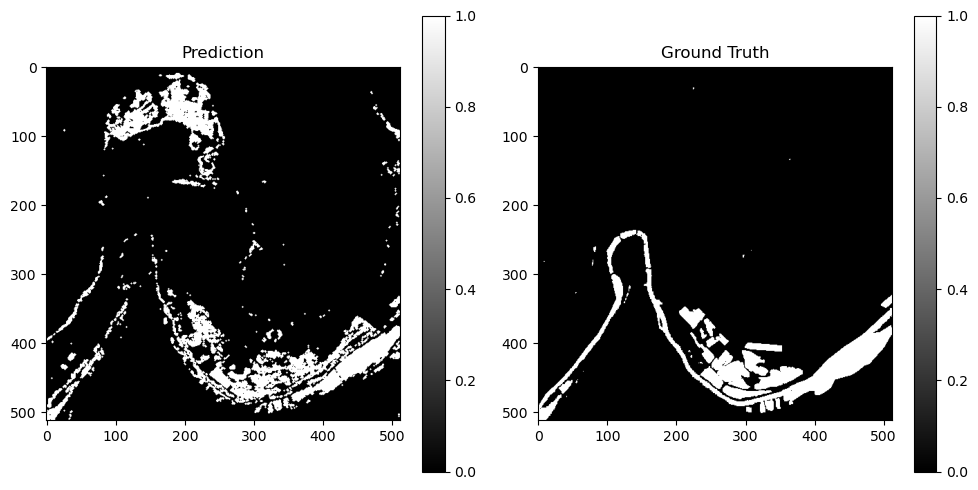

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


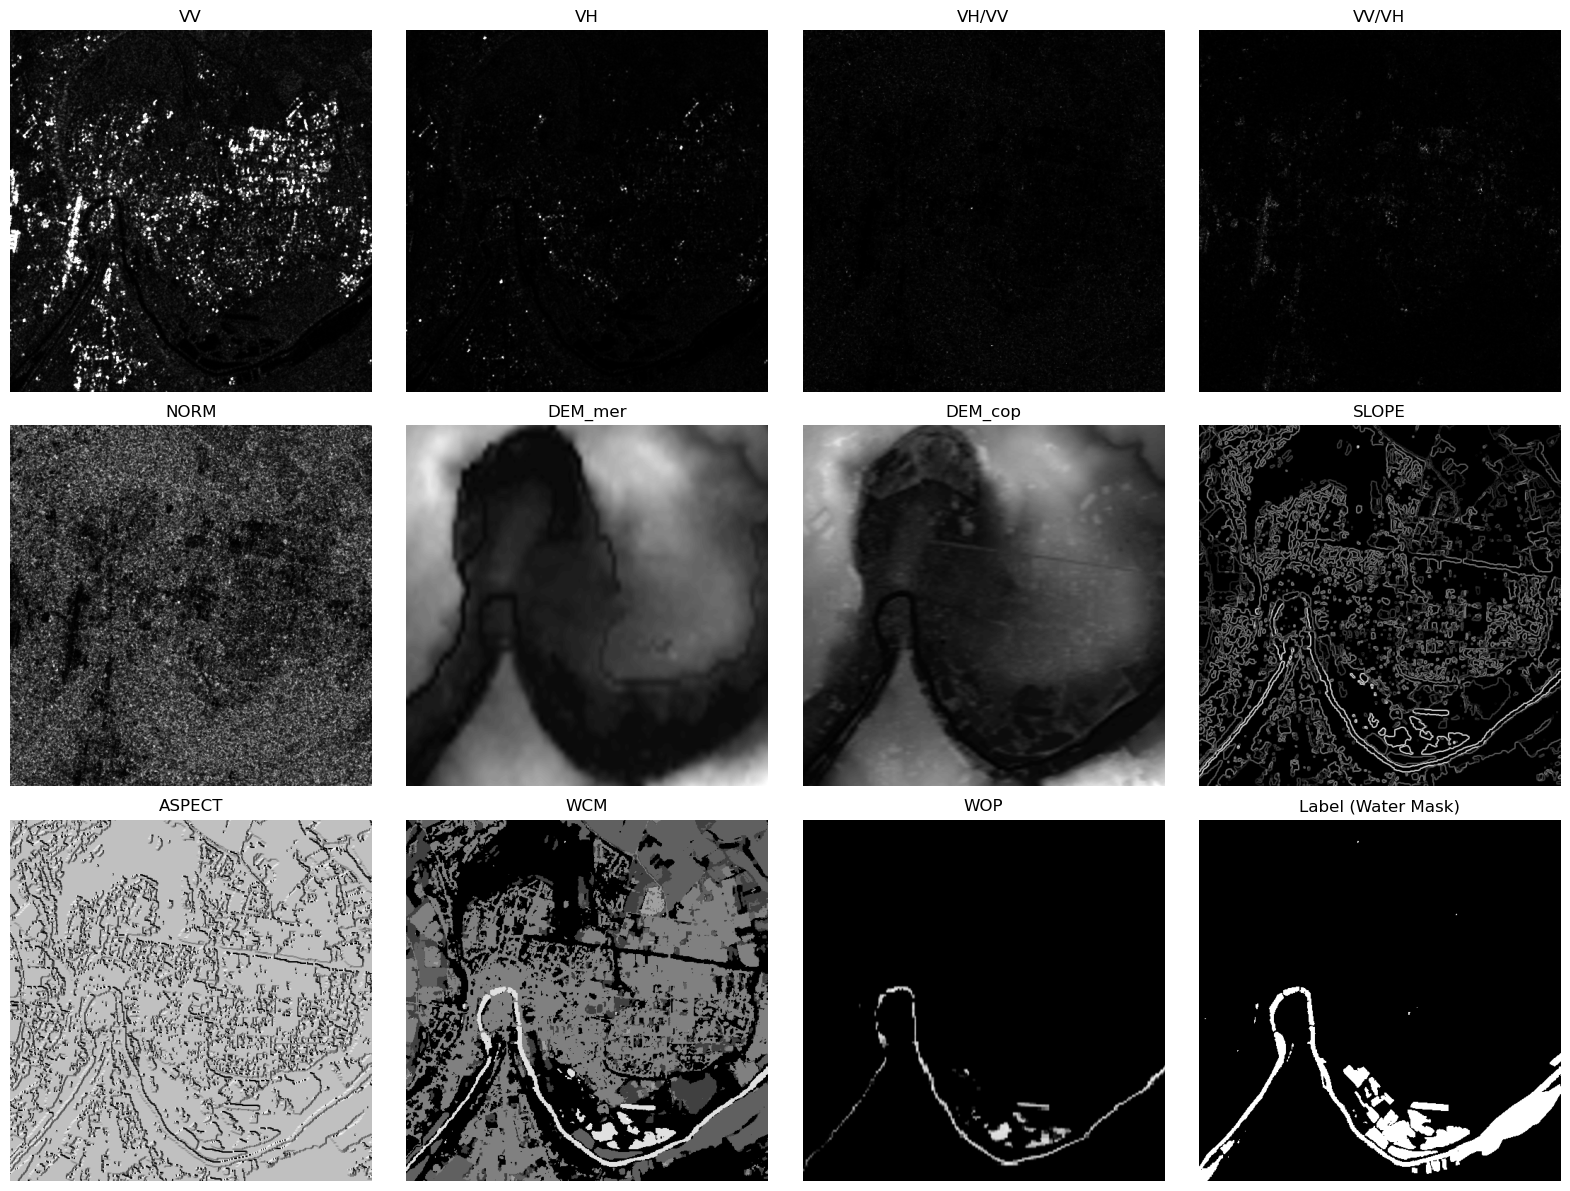

In [111]:
# Reshape to viz
img_pred = np.reshape(img_pred,(row,col))
label = np.reshape(label,(row,col))

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Prediction image
im1 = axs[0].imshow(img_pred, cmap='gray')
axs[0].set_title('Prediction')
fig.colorbar(im1, ax=axs[0])

# Ground truth label
im2 = axs[1].imshow(label, cmap='gray')
axs[1].set_title('Ground Truth')
fig.colorbar(im2, ax=axs[1])

# Show the plots
plt.tight_layout()
plt.show()

image_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/images'
label_dir = 'C:/Users/maria/Documents/01_Teledeteccion/04_AEI/00_Practicas/Trabajo/Inputs/train/labels' 
vz.visualize_features(num_file, image_dir,label_dir)